# Characterization of ALPACA's modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Preparation
First we read the membership file from ALPACA, the two networks, and we prepare the data

In [3]:
# Output directory
import os
outputDir = "../results/alpaca-batch-coad-subtype-connnectivity-20250317/"
if not os.path.exists(outputDir):
    os.makedirs(outputDir)
# ALPACA membership file
membership_fn = "../data/processed/alpaca-batch-coad-subtype-20240510/membership_csm2_csm4.csv"
# Read membership
membership = pd.read_csv(membership_fn)
membership.head()


,node,module,modularity
0,ALX1_A,1,0.006097
1,ALX3_A,2,0.011064
2,ALX4_A,1,0.005248
3,AR_A,2,0.001445
4,ARGFX_A,2,0.012254


In [4]:
# clean membership table splitting node into node_name and node_type
membership['node_name'] = membership.node.str.split('_').str[0]
membership['node_type'] = membership.node.str.split('_').str[1]
membership.head()


,node,module,modularity,node_name,node_type
0,ALX1_A,1,0.006097,ALX1,A
1,ALX3_A,2,0.011064,ALX3,A
2,ALX4_A,1,0.005248,ALX4,A
3,AR_A,2,0.001445,AR,A
4,ARGFX_A,2,0.012254,ARGFX,A


## Analysis of PANDA connectivity

Here, using the modules identified by ALPACA, we check the differences in connectivity between the two subtypes

In [1]:
# read the two networks
cms2_net = pd.read_csv("../data/processed/batch-coad-subtype-20240510/tcga_coad_cms2/analysis/panda/panda_tcga_coad_cms2.txt", sep=" ", index_col=0)
cms4_net = pd.read_csv("../data/processed/batch-coad-subtype-20240510/tcga_coad_cms4/analysis/panda/panda_tcga_coad_cms4.txt", sep=" ", index_col=0)

NameError: name 'pd' is not defined

In [5]:
# read the two networks
cms2_net = pd.read_csv("../../tcga-coad-subtype/results/batch-coad-subtype-20240510/tcga_coad_cms2/analysis/panda/panda_tcga_coad_cms2.txt", sep=" ", index_col=0)
cms4_net = pd.read_csv("../../tcga-coad-subtype/results/batch-coad-subtype-20240510/tcga_coad_cms4/analysis/panda/panda_tcga_coad_cms4.txt", sep=" ", index_col=0)

### Prepare an edge membership table

In [6]:
# melt the dataframe and keep the index
cms2_long = cms2_net.melt(ignore_index = False, var_name = 'gene', value_name='cms2').reset_index()
cms4_long = cms4_net.melt(ignore_index = False, var_name = 'gene', value_name='cms4').reset_index()

In [7]:
# Get the two nets
nets = cms2_long.merge(cms4_long, on =['tf','gene'], how = 'inner')
nets.shape

(19590053, 4)

In [8]:
nets.head()

,tf,gene,cms2,cms4
0,ALX1,ENSG00000000003,1.639950,0.701865
1,ALX3,ENSG00000000003,0.463252,0.087116
2,ALX4,ENSG00000000003,1.347992,0.552226
3,AR,ENSG00000000003,-0.986745,-0.862890
4,ARGFX,ENSG00000000003,0.887296,0.290060


In [9]:
# In this table we report each edge (tf-gene) , the CMS2 and CMS4 values and the membership of the gene and the tf
edge_membership = nets.merge(membership, left_on='gene', right_on='node_name', how = 'left')
edge_membership = edge_membership.merge(membership, left_on='tf', right_on='node_name', how = 'left', suffixes=('_gene', '_tf'))
edge_membership.head()

,tf,gene,cms2,cms4,node_gene,module_gene,modularity_gene,node_name_gene,node_type_gene,node_tf,module_tf,modularity_tf,node_name_tf,node_type_tf
0,ALX1,ENSG00000000003,1.639950,0.701865,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX1_A,1,0.006097,ALX1,A
1,ALX3,ENSG00000000003,0.463252,0.087116,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX3_A,2,0.011064,ALX3,A
2,ALX4,ENSG00000000003,1.347992,0.552226,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX4_A,1,0.005248,ALX4,A
3,AR,ENSG00000000003,-0.986745,-0.862890,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,AR_A,2,0.001445,AR,A
4,ARGFX,ENSG00000000003,0.887296,0.290060,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ARGFX_A,2,0.012254,ARGFX,A


In [13]:
# For each edge, check if TF-gene are in the same module
edge_membership['same_module'] = edge_membership.module_gene == edge_membership.module_tf
edge_membership['edge_module'] = edge_membership['same_module'].astype(int) * edge_membership['module_gene'].astype(int)
edge_membership

,tf,gene,cms2,cms4,node_gene,module_gene,modularity_gene,node_name_gene,node_type_gene,node_tf,module_tf,modularity_tf,node_name_tf,node_type_tf,same_module,edge_module
0,ALX1,ENSG00000000003,1.639950,0.701865,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX1_A,1,0.006097,ALX1,A,False,0
1,ALX3,ENSG00000000003,0.463252,0.087116,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX3_A,2,0.011064,ALX3,A,False,0
2,ALX4,ENSG00000000003,1.347992,0.552226,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX4_A,1,0.005248,ALX4,A,False,0
3,AR,ENSG00000000003,-0.986745,-0.862890,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,AR_A,2,0.001445,AR,A,False,0
4,ARGFX,ENSG00000000003,0.887296,0.290060,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ARGFX_A,2,0.012254,ARGFX,A,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19590048,ZSCAN4,ENSG00000284594,-0.292792,-0.106729,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN4_A,2,0.002642,ZSCAN4,A,True,2
19590049,ZSCAN5,ENSG00000284594,0.836854,0.792892,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN5_A,4,0.002277,ZSCAN5,A,False,0
19590050,ZSCAN5C,ENSG00000284594,-0.752496,-0.782719,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN5C_A,4,0.000994,ZSCAN5C,A,False,0
19590051,ZSCAN9,ENSG00000284594,-1.703456,-1.760072,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN9_A,1,0.002776,ZSCAN9,A,False,0


In [14]:
# Compute the edge difference and absolute edge difference
edge_membership['diff_edge'] = edge_membership['cms2'] - edge_membership['cms4']
edge_membership['diff_edge_abs'] = abs(edge_membership['diff_edge'])
edge_membership

,tf,gene,cms2,cms4,node_gene,module_gene,modularity_gene,node_name_gene,node_type_gene,node_tf,module_tf,modularity_tf,node_name_tf,node_type_tf,same_module,edge_module,diff_edge,diff_edge_abs
0,ALX1,ENSG00000000003,1.639950,0.701865,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX1_A,1,0.006097,ALX1,A,False,0,0.938085,0.938085
1,ALX3,ENSG00000000003,0.463252,0.087116,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX3_A,2,0.011064,ALX3,A,False,0,0.376136,0.376136
2,ALX4,ENSG00000000003,1.347992,0.552226,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX4_A,1,0.005248,ALX4,A,False,0,0.795765,0.795765
3,AR,ENSG00000000003,-0.986745,-0.862890,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,AR_A,2,0.001445,AR,A,False,0,-0.123855,0.123855
4,ARGFX,ENSG00000000003,0.887296,0.290060,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ARGFX_A,2,0.012254,ARGFX,A,False,0,0.597237,0.597237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19590048,ZSCAN4,ENSG00000284594,-0.292792,-0.106729,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN4_A,2,0.002642,ZSCAN4,A,True,2,-0.186063,0.186063
19590049,ZSCAN5,ENSG00000284594,0.836854,0.792892,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN5_A,4,0.002277,ZSCAN5,A,False,0,0.043963,0.043963
19590050,ZSCAN5C,ENSG00000284594,-0.752496,-0.782719,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN5C_A,4,0.000994,ZSCAN5C,A,False,0,0.030223,0.030223
19590051,ZSCAN9,ENSG00000284594,-1.703456,-1.760072,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN9_A,1,0.002776,ZSCAN9,A,False,0,0.056616,0.056616


In [15]:
# We add an indicator to count the edges
edge_membership['is_edge'] = 1
edge_membership

,tf,gene,cms2,cms4,node_gene,module_gene,modularity_gene,node_name_gene,node_type_gene,node_tf,module_tf,modularity_tf,node_name_tf,node_type_tf,same_module,edge_module,diff_edge,diff_edge_abs,is_edge
0,ALX1,ENSG00000000003,1.639950,0.701865,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX1_A,1,0.006097,ALX1,A,False,0,0.938085,0.938085,1
1,ALX3,ENSG00000000003,0.463252,0.087116,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX3_A,2,0.011064,ALX3,A,False,0,0.376136,0.376136,1
2,ALX4,ENSG00000000003,1.347992,0.552226,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ALX4_A,1,0.005248,ALX4,A,False,0,0.795765,0.795765,1
3,AR,ENSG00000000003,-0.986745,-0.862890,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,AR_A,2,0.001445,AR,A,False,0,-0.123855,0.123855,1
4,ARGFX,ENSG00000000003,0.887296,0.290060,ENSG00000000003_B,7,0.002225,ENSG00000000003,B,ARGFX_A,2,0.012254,ARGFX,A,False,0,0.597237,0.597237,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19590048,ZSCAN4,ENSG00000284594,-0.292792,-0.106729,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN4_A,2,0.002642,ZSCAN4,A,True,2,-0.186063,0.186063,1
19590049,ZSCAN5,ENSG00000284594,0.836854,0.792892,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN5_A,4,0.002277,ZSCAN5,A,False,0,0.043963,0.043963,1
19590050,ZSCAN5C,ENSG00000284594,-0.752496,-0.782719,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN5C_A,4,0.000994,ZSCAN5C,A,False,0,0.030223,0.030223,1
19590051,ZSCAN9,ENSG00000284594,-1.703456,-1.760072,ENSG00000284594_B,2,0.000089,ENSG00000284594,B,ZSCAN9_A,1,0.002776,ZSCAN9,A,False,0,0.056616,0.056616,1


In [65]:
# We compute the IN- and OUT-module degrees
same_module_degrees = (edge_membership[edge_membership['same_module'] == True]).loc[:,['gene','module_gene','cms2','cms4','diff_edge','diff_edge_abs','is_edge']].groupby(['gene','module_gene']).sum().reset_index()
same_module_degrees['same_module'] = True
diff_module_degrees = (edge_membership[edge_membership['same_module'] == False]).loc[:,['gene','module_gene','cms2','cms4','diff_edge','diff_edge_abs','is_edge']].groupby(['gene','module_gene']).sum().reset_index()
diff_module_degrees['same_module'] = False
module_degrees = pd.concat([same_module_degrees, diff_module_degrees], axis=0)
module_degrees.sort_values('gene')

,gene,module_gene,cms2,cms4,diff_edge,diff_edge_abs,is_edge,same_module
0,ENSG00000000003,7,15,19,-3.5,5.9,20,True
0,ENSG00000000003,7,-9.6,-99,90,3.5e+02,977,False
1,ENSG00000000005,2,-1.8e+02,-1.9e+02,7.3,83,754,False
1,ENSG00000000005,2,20,-8.1,28,29,243,True
2,ENSG00000000419,2,2e+02,2e+02,-4,13,243,True
...,...,...,...,...,...,...,...,...
19618,ENSG00000284564,1,1e+02,2e+02,-94,95,251,True
19619,ENSG00000284570,1,3.3e+02,3.8e+02,-50,51,251,True
19647,ENSG00000284570,1,-4.1e+02,-4.9e+02,76,1.5e+02,746,False
19620,ENSG00000284594,2,-1.3e+02,-1.3e+02,5,15,243,True


FWER threshold: , 0.0016129032258064516
Module 1,stat:385813.0, p: 0.0
Module 2,stat:2143764.0, p: 1.8729015239018414e-32
Module 3,stat:36981.0, p: 0.005900874893958021
Module 4,stat:1433866.0, p: 0.0
Module 5,stat:98890.0, p: 0.0002123507912633931
Module 6,stat:104579.0, p: 2.2754201289414773e-19
Module 7,stat:32643.0, p: 3.154133866856099e-05
Module 8,stat:2663962.0, p: 8.132157319803211e-07
Module 9,stat:218707.0, p: 7.614819402960453e-07
Module 10,stat:955.0, p: 0.008536097523712965
Module 11,stat:869.0, p: 1.5909601385626815e-09
Module 12,stat:98998.0, p: 0.3369269658896168
Module 13,stat:9620.0, p: 0.0619823983567691
Module 14,stat:62.0, p: 0.1956329345703125


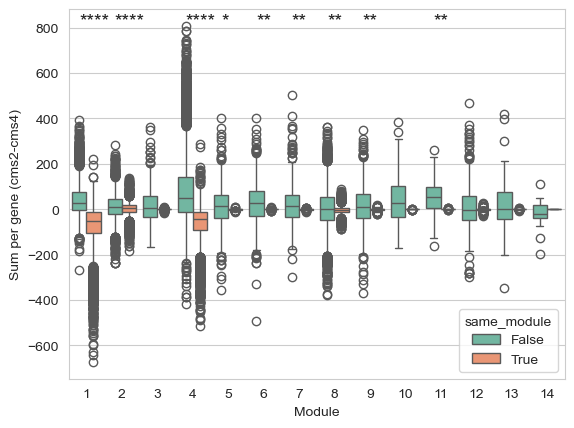

In [68]:
def return_significance(p):
    if p<1e-30:
        return '****'
    elif p<1e-3:
        return '**'
    elif p<1e-2:
        return '*'
    else:
        return('')

# seaborn set color to whitegrid
sns.set_style('whitegrid')

sigs = []
n_bonferroni = len(module_degrees['module_gene'].unique())
print(f'FWER threshold: , {0.05/n_bonferroni}')
df_wilk_genes = pd.DataFrame()
for module, tab in module_degrees[module_degrees['module_gene']<15].groupby('module_gene'):
    stat, p = stats.wilcoxon(tab[tab['same_module']==True]['diff_edge'], tab[tab['same_module']==False]['diff_edge'])
    a = return_significance(p*n_bonferroni)
    sigs.append(a)
    print(f'Module {module},stat:{stat}, p: {p}')
    df_wilk_genes = pd.concat([df_wilk_genes, pd.DataFrame({'module': module, 'stat': stat, 'p': p, 'Bonferroni FWER': np.min([1., p*n_bonferroni]),
                                                        "mean IN-module degree": np.mean(tab[tab['same_module']==True]['diff_edge']),
                                                        "mean OUT-module degree": np.mean(tab[tab['same_module']==False]['diff_edge'])}, index=[0])], axis=0)

sns.boxplot(x='module_gene', y='diff_edge', data=module_degrees[module_degrees['module_gene']<15], hue = 'same_module', palette = 'Set2')
# annotate significance
for i, txt in enumerate(sigs):
    plt.annotate(txt, (i-0.2, np.max(module_degrees[module_degrees['module_gene']<15]['diff_edge'])), fontsize=14)
plt.xlabel('Module')
plt.ylabel('Sum per gene (cms2-cms4)')
plt.show()

In [38]:
df_wilk_genes.module = df_wilk_genes.module.astype('str')

In [69]:
pd.options.display.float_format = None
pd.set_option('display.float_format', '{:.2g}'.format)
print(df_wilk_genes.to_latex(index=False,
                  formatters={"name": str.upper,"stat": "{:.2f}".format, "p": "{:.2E}".format, "Bonferroni FWER": "{:.2E}".format},
))

\begin{tabular}{rrrrrr}
\toprule
module & stat & p & Bonferroni FWER & mean IN-module degree & mean OUT-module degree \\
\midrule
1 & 385813.00 & 0.00E+00 & 0.00E+00 & -78.194178 & 43.655882 \\
2 & 2143764.00 & 1.87E-32 & 5.81E-31 & 2.421301 & 10.373974 \\
3 & 36981.00 & 5.90E-03 & 1.83E-01 & -0.132168 & 13.994770 \\
4 & 1433866.00 & 0.00E+00 & 0.00E+00 & -63.115197 & 89.458204 \\
5 & 98890.00 & 2.12E-04 & 6.58E-03 & 0.165063 & 12.623169 \\
6 & 104579.00 & 2.28E-19 & 7.05E-18 & 0.347839 & 28.194577 \\
7 & 32643.00 & 3.15E-05 & 9.78E-04 & -0.414056 & 21.782637 \\
8 & 2663962.00 & 8.13E-07 & 2.52E-05 & -4.844230 & 2.151773 \\
9 & 218707.00 & 7.61E-07 & 2.36E-05 & -1.094298 & 14.393717 \\
10 & 955.00 & 8.54E-03 & 2.65E-01 & 0.074718 & 39.860753 \\
11 & 869.00 & 1.59E-09 & 4.93E-08 & 0.659262 & 53.029421 \\
12 & 98998.00 & 3.37E-01 & 1.00E+00 & -0.456192 & 9.702970 \\
13 & 9620.00 & 6.20E-02 & 1.00E+00 & -0.154742 & 14.593134 \\
14 & 62.00 & 1.96E-01 & 1.00E+00 & 0.024142 & -20.562472 \\
\

### Now we do the same for TFs (compute degrees and differential degrees)

In [53]:
same_module_degrees = (edge_membership[edge_membership['same_module'] == True]).loc[:,['tf','module_tf','cms2','cms4','diff_edge','diff_edge_abs','is_edge']].groupby(['tf','module_tf']).sum().reset_index()
same_module_degrees['same_module'] = True
diff_module_degrees = (edge_membership[edge_membership['same_module'] == False]).loc[:,['tf','module_tf','cms2','cms4','diff_edge','diff_edge_abs','is_edge']].groupby(['tf','module_tf']).sum().reset_index()
diff_module_degrees['same_module'] = False
tf_degrees = pd.concat([same_module_degrees, diff_module_degrees], axis=0)
tf_degrees.sort_values('tf')

tf_degrees['differential_degree'] = tf_degrees['cms2'] - tf_degrees['cms4']


In [54]:
tf_degrees

,tf,module_tf,cms2,cms4,diff_edge,diff_edge_abs,is_edge,same_module,differential_degree
0,ALX1,1,5.6e+03,7.5e+03,-1.8e+03,2e+03,3601,True,-1.8e+03
1,ALX3,2,3.9e+03,3.9e+03,-45,5.4e+02,3351,True,-45
2,ALX4,1,4.7e+03,6.4e+03,-1.6e+03,1.8e+03,3601,True,-1.6e+03
3,AR,2,-1.5e+03,-1.6e+03,82,3.3e+02,3351,True,82
4,ARGFX,2,6.1e+03,6.2e+03,-89,8.7e+02,3351,True,-89
...,...,...,...,...,...,...,...,...,...
992,ZSCAN4,2,-2.2e+03,-2.4e+03,2e+02,4.7e+03,16298,False,2e+02
993,ZSCAN5,4,-3.5e+03,-4.7e+03,1.2e+03,3.1e+03,14829,False,1.2e+03
994,ZSCAN5C,4,-81,1.8e+02,-2.6e+02,2.4e+03,14829,False,-2.6e+02
995,ZSCAN9,1,1.9e+02,-1.2e+03,1.4e+03,5.4e+03,16048,False,1.4e+03


In [58]:
tab[tab['same_module']==True]

,tf,module_tf,cms2,cms4,diff_edge,diff_edge_abs,is_edge,same_module,differential_degree
817,ZNF385D,14,87,87,0.46,2.3,19,True,0.46


FWER threshold: , 0.0035714285714285718
Module 1,stat:40.0, p: 1.0248886991655897e-42
Module 2,stat:7088.0, p: 1.7654741798452378e-12
Module 3,stat:11.0, p: 0.0008392333984375
Module 4,stat:788.0, p: 9.046025939011586e-42
Module 5,stat:207.0, p: 0.83135736733675
Module 6,stat:2.0, p: 1.3969838619232178e-09
Module 7,stat:83.0, p: 0.4304332733154297
Module 8,stat:254.0, p: 1.909507566350996e-06
Module 9,stat:136.0, p: 0.00011535796875250526
Module 10,stat:3.0, p: 1.0
Module 11,stat:0.0, p: 0.03125
Module 12,stat:28.0, p: 0.0006937980651855469
Module 13,stat:0.0, p: 0.015625
Module 14,stat:0.0, p: 1.0


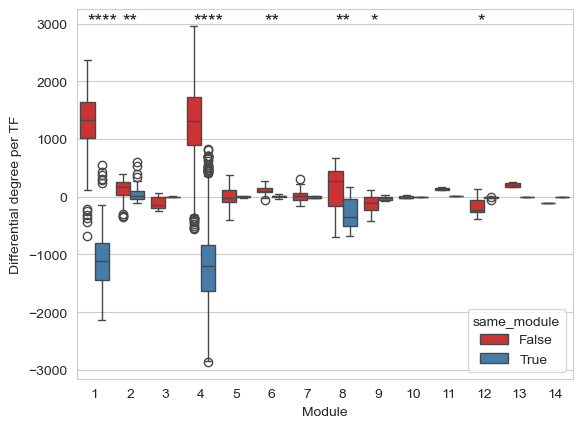

In [61]:
sigs = []
n_bonferroni = len(tf_degrees['module_tf'].unique())
print(f'FWER threshold: , {0.05/n_bonferroni}')
df_wilk_tfs = pd.DataFrame()

for module, tab in tf_degrees[tf_degrees['module_tf']<15].groupby('module_tf'):
    

    stat, p = stats.wilcoxon(tab[tab['same_module']==True]['differential_degree'], tab[tab['same_module']==False]['differential_degree'])
    a = return_significance(p*n_bonferroni)
    sigs.append(a)
    print(f'Module {module},stat:{stat}, p: {p}')
    
    df_wilk_tfs = pd.concat([df_wilk_tfs, pd.DataFrame({'module': module, 
                                                        'stat': stat, 
                                                        'p': p, 
                                                        'Bonferroni FWER': np.min([1., p*n_bonferroni]),
                                                        "mean IN-module degree": np.mean(tab[tab['same_module']==True]['differential_degree']),
                                                        "mean OUT-module degree": np.mean(tab[tab['same_module']==False]['differential_degree'])                                                       
                                                        }, index=[0])], axis=0)


sns.boxplot(x='module_tf', y='differential_degree', data=tf_degrees[tf_degrees['module_tf']<15], hue = 'same_module', palette = 'Set1')
# annotate significance
for i, txt in enumerate(sigs):
    plt.annotate(txt, (i-0.2, np.max(tf_degrees[tf_degrees['module_tf']<15]['differential_degree'])), fontsize=14)
plt.xlabel('Module')
plt.ylabel('Differential degree per TF')
plt.show()

In [62]:
pd.options.display.float_format = None
pd.set_option('display.float_format', '{:.2g}'.format)
print(df_wilk_tfs.to_latex(index=False,
                  formatters={"name": str.upper,"stat": "{:.2f}".format, "p": "{:.2E}".format, "Bonferroni FWER": "{:.2E}".format},
))

\begin{tabular}{rrrrrr}
\toprule
module & stat & p & Bonferroni FWER & mean IN-module degree & mean OUT-module degree \\
\midrule
1 & 40.00 & 1.02E-42 & 1.43E-41 & -1121.821654 & 1331.685448 \\
2 & 7088.00 & 1.77E-12 & 2.47E-11 & 33.390045 & 133.276001 \\
3 & 11.00 & 8.39E-04 & 1.17E-02 & -3.249790 & -110.794156 \\
4 & 788.00 & 9.05E-42 & 1.27E-40 & -1139.382961 & 1268.302363 \\
5 & 207.00 & 8.31E-01 & 1.00E+00 & 3.910279 & -2.354879 \\
6 & 2.00 & 1.40E-09 & 1.96E-08 & 8.815545 & 115.128064 \\
7 & 83.00 & 4.30E-01 & 1.00E+00 & -8.550258 & 13.984968 \\
8 & 254.00 & 1.91E-06 & 2.67E-05 & -282.032701 & 170.765688 \\
9 & 136.00 & 1.15E-04 & 1.62E-03 & -28.205519 & -121.859152 \\
10 & 3.00 & 1.00E+00 & 1.00E+00 & 1.892866 & -2.441624 \\
11 & 0.00 & 3.12E-02 & 4.38E-01 & 11.427210 & 139.448435 \\
12 & 28.00 & 6.94E-04 & 9.71E-03 & -13.333253 & -158.706423 \\
13 & 0.00 & 1.56E-02 & 2.19E-01 & -4.686480 & 206.724260 \\
14 & 0.00 & 1.00E+00 & 1.00E+00 & 0.458702 & -102.928285 \\
\bottomrule
\en

### Check the leading TF by modularity

In [36]:
membership_tf = membership[membership['node_type']=='A']
map_n_tf = membership_tf.loc[:,['module','node_name']].groupby('module').count().rename(columns={'node_name':'n_tf'})
membership_tf = membership_tf.merge(map_n_tf, left_on='module', right_index=True)
membership_tf['raw_modularity'] = membership_tf['modularity'] * membership_tf['n_tf']
membership_tf

,node,module,modularity,node_name,node_type,n_tf,raw_modularity
0,ALX1_A,1,0.006097,ALX1,A,251,1.530413
1,ALX3_A,2,0.011064,ALX3,A,243,2.688537
2,ALX4_A,1,0.005248,ALX4,A,251,1.317150
3,AR_A,2,0.001445,AR,A,243,0.351055
4,ARGFX_A,2,0.012254,ARGFX,A,243,2.977676
...,...,...,...,...,...,...,...
992,ZSCAN4_A,2,0.002642,ZSCAN4,A,243,0.642077
993,ZSCAN5_A,4,0.002277,ZSCAN5,A,267,0.607919
994,ZSCAN5C_A,4,0.000994,ZSCAN5C,A,267,0.265437
995,ZSCAN9_A,1,0.002776,ZSCAN9,A,251,0.696806


In [71]:
membership_gene = membership[membership['node_type']=='B']

In [72]:
# Cluster of interest 1,2 4,6,8
membership_tf[membership_tf['module'].isin([1,2,4,6,8])].sort_values(['raw_modularity'], ascending=[False])

,node,module,modularity,node_name,node_type,n_tf,raw_modularity
742,ZNF180_A,4,0.014,ZNF180,A,267,3.7
867,ZNF529_A,4,0.014,ZNF529,A,267,3.7
336,LHX9_A,2,0.015,LHX9,A,243,3.6
335,LHX8_A,2,0.015,LHX8,A,243,3.5
325,LBX1_A,2,0.015,LBX1,A,243,3.5
...,...,...,...,...,...,...,...
675,ZBTB3_A,8,0.0011,ZBTB3,A,59,0.062
89,E2F2_A,6,0.0018,E2F2,A,32,0.056
842,ZNF449_A,8,0.00094,ZNF449,A,59,0.055
398,NFE2_A,8,0.00059,NFE2,A,59,0.035


In [74]:
top_tfs = pd.DataFrame()
for k, tab in membership_tf.groupby('module'):
    print(k)
    # select the first 100 edges based on the first 10 tf modularities and the first 10 gene modularities
    print(tab.sort_values('modularity', ascending=False)['node_name'].values[:10].tolist())
    top_tfs = pd.concat([top_tfs, tab.sort_values('modularity', ascending=False).head(10)], axis=0)

1
['ZNF334', 'FOXD2', 'HMG20B', 'ZNF33B', 'FOXD3', 'POU3F3', 'VSX2', 'ARID5B', 'NR1H4', 'ZNF25']
2
['LHX9', 'LHX8', 'LBX1', 'PBX4', 'DLX6', 'LHX2', 'SHOX2', 'PRRX1', 'PRRX2', 'SHOX']
3
['ARNT', 'ARNT2', 'BHLHE41', 'ARNTL', 'TFE3', 'BHLHE40', 'MLXIPL', 'MLX', 'SREBF2', 'USF1']
4
['ZNF180', 'ZNF529', 'ZNF341', 'ZNF444', 'ZNF467', 'PRDM9', 'ZNF468', 'ZNF304', 'ZNF383', 'ZNF880']
5
['FOSB', 'FOSL2', 'CREB5', 'ATF3', 'CREM', 'ATF2', 'CREB3L4', 'CREB1', 'FOSL1', 'ATF7']
6
['OLIG3', 'OLIG1', 'ATOH7', 'BHLHE23', 'NEUROD2', 'NEUROG1', 'NEUROG2', 'BHLHE22', 'PPARD', 'RXRA']
7
['HEY1', 'HEY2', 'HEYL', 'HES2', 'HES5', 'HES1', 'HES7', 'MYCN', 'HOXD1', 'HOXC8']
8
['ZNF225', 'ZNF487', 'ZNF235', 'ZNF287', 'ZNF443', 'PRDM6', 'ZNF182', 'ZNF496', 'ZNF181', 'ZNF98']
9
['ELK4', 'ELK3', 'ETV4', 'ETV1', 'ETV3', 'ERF', 'GABPA', 'FLI1', 'FEV', 'ELK1']
10
['GLI3', 'GLI1', 'GLI2']
11
['HOXC9', 'HOXB9', 'HOXA11', 'HOXA10', 'HOXD11', 'KDM2B']
12
['KLF6', 'KLF12', 'KLF14', 'KLF2', 'SP3', 'KLF4', 'KLF3', 'SP9', 'KLF

In [75]:
top_tfs[top_tfs['module'].isin([1,2,4])]

,node,module,modularity,node_name,node_type,n_tf,raw_modularity
802,ZNF334_A,1,0.011,ZNF334,A,251,2.7
154,FOXD2_A,1,0.0097,FOXD2,A,251,2.4
233,HMG20B_A,1,0.0095,HMG20B,A,251,2.4
804,ZNF33B_A,1,0.0091,ZNF33B,A,251,2.3
155,FOXD3_A,1,0.0091,FOXD3,A,251,2.3
488,POU3F3_A,1,0.0091,POU3F3,A,251,2.3
659,VSX2_A,1,0.009,VSX2,A,251,2.3
6,ARID5B_A,1,0.0088,ARID5B,A,251,2.2
429,NR1H4_A,1,0.0087,NR1H4,A,251,2.2
766,ZNF25_A,1,0.0086,ZNF25,A,251,2.1


/Users/violafanfani/miniconda3/envs/m1-ml-py10/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


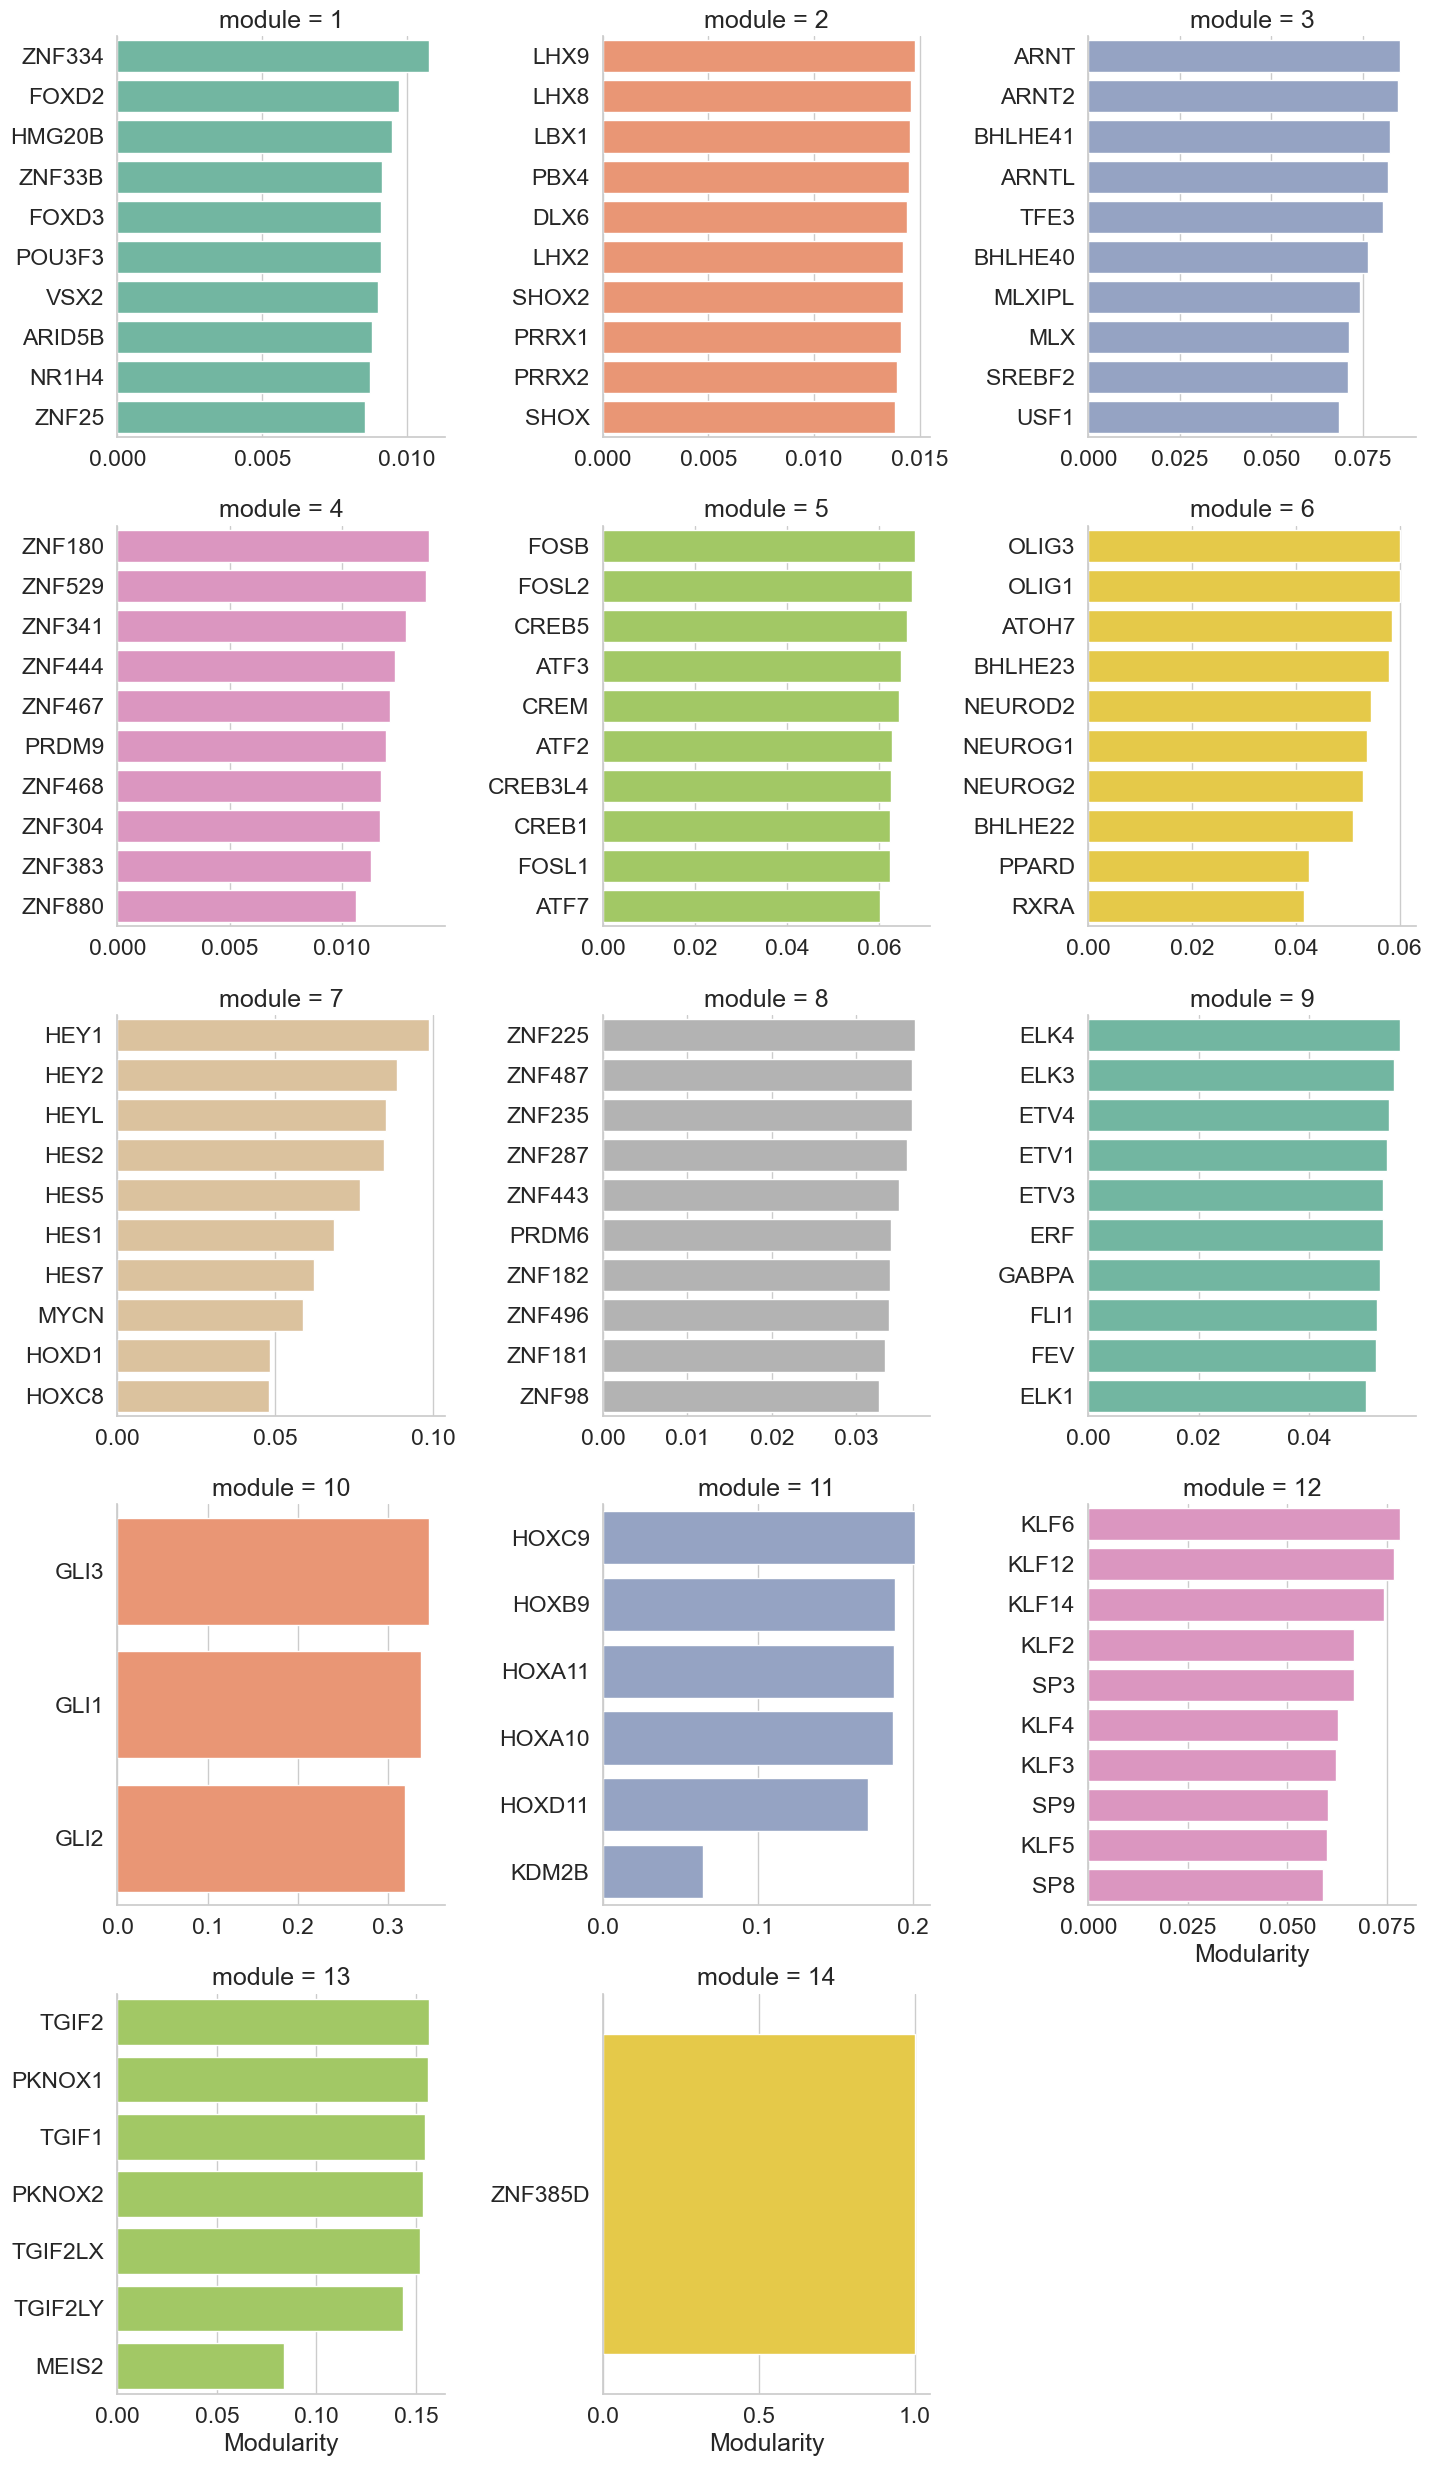

In [98]:
sns.set_context("notebook", font_scale=1.5)
g1 = sns.catplot(col='module', x='modularity', data=top_tfs, y='node_name', palette = 'Set2', hue = 'module', ax = ax, col_wrap=3, height=5, sharey=False, kind = 'bar', legend = False, sharex=False)
g1.set_xlabels('Modularity')
g1.set_ylabels('')
g1.fig.savefig(outputDir + 'top_tfs_modules_all.pdf', dpi=300)

/Users/violafanfani/miniconda3/envs/m1-ml-py10/lib/python3.12/site-packages/seaborn/categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


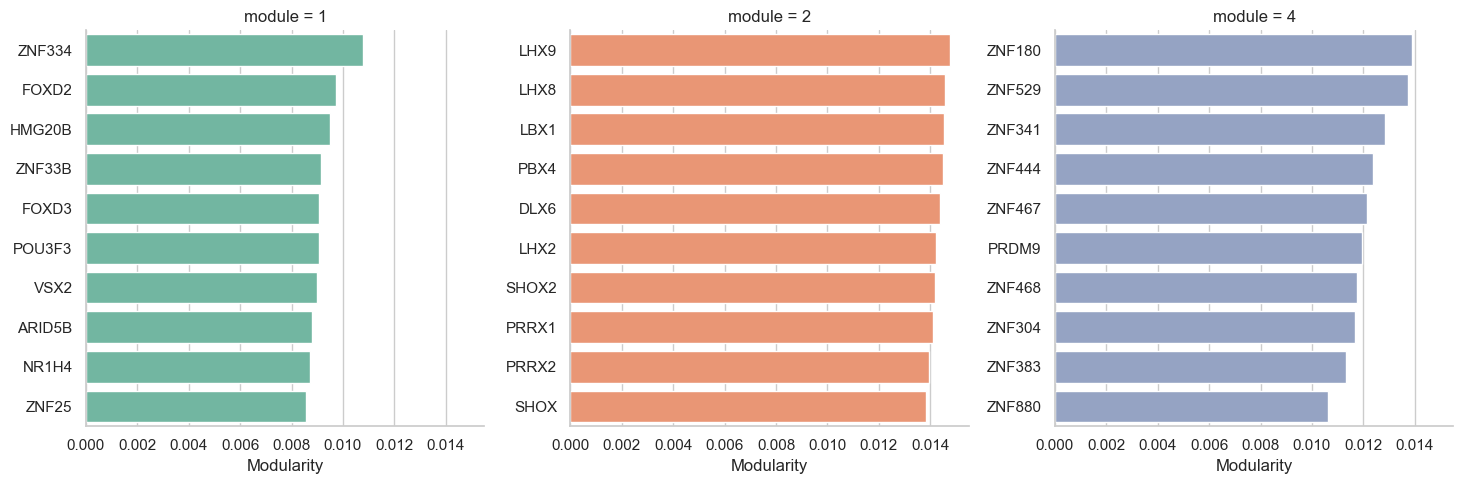

In [94]:
sns.set_context("notebook")
g1 = sns.catplot(col='module', x='modularity', data=top_tfs[top_tfs['module'].isin([1,2,4])], y='node_name', palette = 'Set2', hue = 'module', ax = ax, col_wrap=3, height=5, sharey=False, kind = 'bar', legend = False)
g1.set_xlabels('Modularity')
g1.set_ylabels('')
g1.fig.savefig(outputDir + 'top_tfs_modules_1_2_4.pdf', dpi=300)

## Comparison with DRAGON clusters

In [10]:
membership

,node,module,modularity,node_name,node_type
0,ALX1_A,1,0.006097,ALX1,A
1,ALX3_A,2,0.011064,ALX3,A
2,ALX4_A,1,0.005248,ALX4,A
3,AR_A,2,0.001445,AR,A
4,ARGFX_A,2,0.012254,ARGFX,A
...,...,...,...,...,...
20641,ENSG00000253451_B,8,0.000065,ENSG00000253451,B
20642,ENSG00000278020_B,8,0.000120,ENSG00000278020,B
20643,ENSG00000148926_B,1,0.000090,ENSG00000148926,B
20644,ENSG00000146477_B,4,0.000040,ENSG00000146477,B


In [13]:
# import all functions from utils.py that is inside src folder
from src.utils import *

In [11]:
dragon_fn = {'cms1':'../../tcga-coad-subtype/results/batch-coad-subtype-20240510/tcga_coad_cms1/analysis/dragon/tcga_coad_cms1_dragon_mat.tsv',
             'cms2':'../../tcga-coad-subtype/results/batch-coad-subtype-20240510/tcga_coad_cms2/analysis/dragon/tcga_coad_cms2_dragon_mat.tsv',
             'cms3':'../../tcga-coad-subtype/results/batch-coad-subtype-20240510/tcga_coad_cms3/analysis/dragon/tcga_coad_cms3_dragon_mat.tsv',
             'cms4':'../../tcga-coad-subtype/results/batch-coad-subtype-20240510/tcga_coad_cms4/analysis/dragon/tcga_coad_cms4_dragon_mat.tsv'}
             

In [14]:
# Read the dragons with the function from utils.py
dragons = read_dragons(dragon_fn)

cms1
cms2
cms3
cms4


In [15]:
# to keep track of all the edges we will create a dataframe where subtypes are in the columns and rows are the edges
# For simplicity we write down the order of the subtypes
subtype_order = ['cms2','cms4']
dragon = get_long_dragon(dragons)
dragon.head()

                        level_0                 level_1         0
0        AC023509.3_methylation  AC092835.1_methylation  0.010079
1        AC023509.3_methylation  AC138696.1_methylation  0.001609
2        AC023509.3_methylation       AEBP1_methylation -0.001914
3        AC023509.3_methylation       AEBP2_methylation  0.002398
4        AC023509.3_methylation       AHDC1_methylation  0.004454
...                         ...                     ...       ...
1006066      ZSCAN22_expression         ZXDB_expression  0.000783
1006067      ZSCAN22_expression         ZXDC_expression  0.003939
1006068       ZSCAN9_expression         ZXDB_expression -0.000765
1006069       ZSCAN9_expression         ZXDC_expression  0.000768
1006070         ZXDB_expression         ZXDC_expression  0.000498

[1006071 rows x 3 columns]
                          node1                   node2      cms1
0        AC023509.3_methylation  AC092835.1_methylation  0.010079
1        AC023509.3_methylation  AC138696.1_meth

,node1,node2,cms1,cms2,cms3,cms4
0,AC023509.3_methylation,AC092835.1_methylation,0.010079,-0.002448,-0.012452,0.011108
1,AC023509.3_methylation,AC138696.1_methylation,0.001609,0.008164,0.006137,0.004494
2,AC023509.3_methylation,AEBP1_expression,-0.005313,0.002291,0.003407,-0.005202
3,AC023509.3_methylation,AEBP1_methylation,-0.001914,-0.004333,0.000148,0.002592
4,AC023509.3_methylation,AEBP2_expression,0.001178,0.001567,0.001819,0.001794


In [16]:
# mean dragon value for all subtypes
dragon['mean']  = dragon.loc[:,subtype_order].mean(axis =1)
# absolute mean dragon value for all subtypes
dragon['abs_mean']  = np.abs(dragon.loc[:,subtype_order]).mean(axis =1)
# variance
dragon['var']  = dragon.loc[:,subtype_order].var(axis =1)

# node type, whether expression or methylation
dragon['node1_type'] = [i.split('_')[1] for i in dragon['node1']]
dragon['node2_type'] = [i.split('_')[1] for i in dragon['node2']]
# node name
dragon['node1_tf'] = [i.split('_')[0] for i in dragon['node1']]
dragon['node2_tf'] = [i.split('_')[0] for i in dragon['node2']]

# get absolute values for dragons
dragon.loc[:,[i+'_abs' for i in subtype_order]] = np.abs(dragon.loc[:,subtype_order].values)

# edge name
dragon['edge'] = dragon.node1_tf +'-'+ dragon.node2_tf
dragon = dragon.set_index('edge')
# select same TF edges
dragon['same'] = 1*(dragon.node1_tf == dragon.node2_tf)
dragon.sort_values(by = 'mean', ascending = False)

,node1,node2,cms1,cms2,cms3,cms4,mean,abs_mean,var,node1_type,node2_type,node1_tf,node2_tf,cms2_abs,cms4_abs,same
edge,,,,,,,,,,,,,,,,
ZNF646-ZNF668,ZNF646_methylation,ZNF668_methylation,0.054987,0.066278,0.052999,0.066142,0.066210,0.066210,9.201835e-09,methylation,methylation,ZNF646,ZNF668,0.066278,0.066142,0
HOXA5-HOXA6,HOXA5_methylation,HOXA6_methylation,0.023401,0.053203,0.041463,0.060362,0.056782,0.056782,2.562438e-05,methylation,methylation,HOXA5,HOXA6,0.053203,0.060362,0
ZNF41-ZNF674,ZNF41_methylation,ZNF674_methylation,0.035610,0.047834,0.043143,0.044130,0.045982,0.045982,6.860125e-06,methylation,methylation,ZNF41,ZNF674,0.047834,0.044130,0
ELF4-ZNF81,ELF4_methylation,ZNF81_methylation,0.034261,0.047164,0.042864,0.044439,0.045802,0.045802,3.713136e-06,methylation,methylation,ELF4,ZNF81,0.047164,0.044439,0
ZNF41-ZNF81,ZNF41_methylation,ZNF81_methylation,0.035081,0.047223,0.042872,0.044226,0.045725,0.045725,4.491069e-06,methylation,methylation,ZNF41,ZNF81,0.047223,0.044226,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC-NFIB,ZXDC_methylation,NFIB_expression,NaN,NaN,-0.006304,NaN,NaN,NaN,NaN,methylation,expression,ZXDC,NFIB,NaN,NaN,0
ZXDC-RFX6,ZXDC_methylation,RFX6_expression,NaN,NaN,0.002027,NaN,NaN,NaN,NaN,methylation,expression,ZXDC,RFX6,NaN,NaN,0
ZXDC-RORA,ZXDC_methylation,RORA_expression,0.004828,NaN,-0.002228,NaN,NaN,NaN,NaN,methylation,expression,ZXDC,RORA,NaN,NaN,0


In [17]:
# Get only methylation to expression edges
dragon_trans = dragon[(dragon.node1_type!=dragon.node2_type)]
dragon_trans.head()

,node1,node2,cms1,cms2,cms3,cms4,mean,abs_mean,var,node1_type,node2_type,node1_tf,node2_tf,cms2_abs,cms4_abs,same
edge,,,,,,,,,,,,,,,,
AC023509.3-AEBP1,AC023509.3_methylation,AEBP1_expression,-0.005313,0.002291,0.003407,-0.005202,-0.001455,0.003747,2.807274e-05,methylation,expression,AC023509.3,AEBP1,0.002291,0.005202,0
AC023509.3-AEBP2,AC023509.3_methylation,AEBP2_expression,0.001178,0.001567,0.001819,0.001794,0.001681,0.001681,2.580415e-08,methylation,expression,AC023509.3,AEBP2,0.001567,0.001794,0
AC023509.3-AHDC1,AC023509.3_methylation,AHDC1_expression,-0.002381,-0.005991,-0.001529,-0.001857,-0.003924,0.003924,8.547863e-06,methylation,expression,AC023509.3,AHDC1,0.005991,0.001857,0
AC023509.3-AHR,AC023509.3_methylation,AHR_expression,NaN,NaN,-0.002166,NaN,NaN,NaN,NaN,methylation,expression,AC023509.3,AHR,NaN,NaN,0
AC023509.3-AKAP8L,AC023509.3_methylation,AKAP8L_expression,-0.001239,0.003665,-0.004399,0.005655,0.004660,0.004660,1.979502e-06,methylation,expression,AC023509.3,AKAP8L,0.003665,0.005655,0


/var/folders/1b/jphhn26s4zgfr0k1rxj7wfqr0000gn/T/ipykernel_41708/628571646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dragon_trans['same TF'] = (dragon_trans.node1_tf == dragon_trans.node2_tf)
/var/folders/1b/jphhn26s4zgfr0k1rxj7wfqr0000gn/T/ipykernel_41708/628571646.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1][1].legend().remove()
/var/folders/1b/jphhn26s4zgfr0k1rxj7wfqr0000gn/T/ipykernel_41708/628571646.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0][1].legend().r

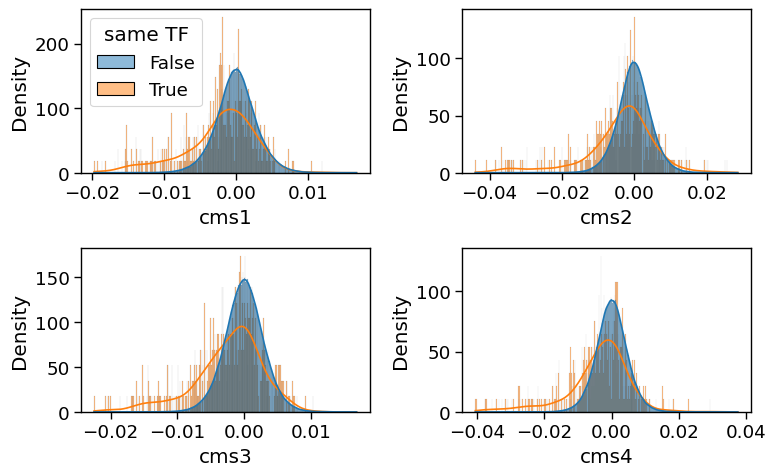

In [18]:
# Add binary label on whether the TFs are the same
sns.set_context('paper', font_scale = 1.5)
dragon_trans['same TF'] = (dragon_trans.node1_tf == dragon_trans.node2_tf)

f, ax = plt.subplots(2,2, figsize = (8,5))
sns.histplot(x = 'cms1', data = dragon_trans, hue = 'same TF', stat = 'density', common_norm  = False, kde = True, ax = ax[0][0])
sns.histplot(x = 'cms2', data = dragon_trans, hue = 'same TF', stat = 'density', common_norm  = False, kde = True, ax = ax[0][1])
sns.histplot(x = 'cms3', data = dragon_trans, hue = 'same TF', stat = 'density', common_norm  = False, kde = True, ax = ax[1][0])
sns.histplot(x = 'cms4', data = dragon_trans, hue = 'same TF', stat = 'density', common_norm  = False, kde = True, ax = ax[1][1])
plt.tight_layout()
ax[1][1].legend().remove()
ax[0][1].legend().remove()
ax[1][0].legend().remove()
plt.tight_layout()

In [20]:
dragon_direct = dragon_trans[dragon_trans['same TF']==True]
dragon_direct.head()

,node1,node2,cms1,cms2,cms3,cms4,mean,abs_mean,var,node1_type,node2_type,node1_tf,node2_tf,cms2_abs,cms4_abs,same,same TF
edge,,,,,,,,,,,,,,,,,
AEBP1-AEBP1,AEBP1_methylation,AEBP1_expression,-0.002624,0.000903,-0.002126,0.000925,0.000914,0.000914,2.353771e-10,methylation,expression,AEBP1,AEBP1,0.000903,0.000925,1,True
AEBP2-AEBP2,AEBP2_methylation,AEBP2_expression,-0.001224,-0.018277,-0.005222,-0.007302,-0.012789,0.012789,6.022419e-05,methylation,expression,AEBP2,AEBP2,0.018277,0.007302,1,True
AHDC1-AHDC1,AHDC1_methylation,AHDC1_expression,-0.002131,-0.001279,-0.004359,-0.000836,-0.001058,0.001058,9.814707e-08,methylation,expression,AHDC1,AHDC1,0.001279,0.000836,1,True
AHR-AHR,AHR_methylation,AHR_expression,NaN,NaN,-0.007369,NaN,NaN,NaN,NaN,methylation,expression,AHR,AHR,NaN,NaN,1,True
AKAP8L-AKAP8L,AKAP8L_methylation,AKAP8L_expression,-0.003496,0.001071,-0.001479,-0.002993,-0.000961,0.002032,8.257889e-06,methylation,expression,AKAP8L,AKAP8L,0.001071,0.002993,1,True


In [46]:
th = 0.1 #quantile threshold

for key in subtype_order:
    threshold = dragon_direct[key].dropna().quantile(th)
    print(key, threshold)
    dragon_direct[key+'_lower'] = dragon_direct[key] < threshold
dragon_direct['lower'] = np.sum(dragon_direct.loc[:,[key+'_lower' for key in subtype_order]], axis = 1)
dragon_direct.sort_values(by = 'lower', ascending = True)


cms2 -0.01590839262254296
cms4 -0.01560371809056855


/var/folders/1b/jphhn26s4zgfr0k1rxj7wfqr0000gn/T/ipykernel_41708/2059425291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dragon_direct[key+'_lower'] = dragon_direct[key] < threshold
/var/folders/1b/jphhn26s4zgfr0k1rxj7wfqr0000gn/T/ipykernel_41708/2059425291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dragon_direct[key+'_lower'] = dragon_direct[key] < threshold
/var/folders/1b/jphhn26s4zgfr0k1rxj7wfqr0000gn/T/ipykernel_41708/2059425291.py:7: SettingWithCopyWarning: 
A value is trying to be set

,node1,node2,cms1,cms2,cms3,cms4,mean,abs_mean,var,node1_type,node2_type,node1_tf,node2_tf,cms2_abs,cms4_abs,same,same TF,cms2_lower,cms4_lower,lower
edge,,,,,,,,,,,,,,,,,,,,
AEBP1-AEBP1,AEBP1_methylation,AEBP1_expression,-0.002624,0.000903,-0.002126,0.000925,0.000914,0.000914,2.353771e-10,methylation,expression,AEBP1,AEBP1,0.000903,0.000925,1,True,False,False,0
TFDP1-TFDP1,TFDP1_methylation,TFDP1_expression,-0.005131,0.001965,0.003104,-0.005021,-0.001528,0.003493,2.440276e-05,methylation,expression,TFDP1,TFDP1,0.001965,0.005021,1,True,False,False,0
TFEC-TFEC,TFEC_methylation,TFEC_expression,0.000359,-0.005376,-0.000557,0.001816,-0.001780,0.003596,2.586179e-05,methylation,expression,TFEC,TFEC,0.005376,0.001816,1,True,False,False,0
TGIF2-TGIF2,TGIF2_methylation,TGIF2_expression,-0.001997,-0.007947,-0.007138,0.006296,-0.000825,0.007121,1.014306e-04,methylation,expression,TGIF2,TGIF2,0.007947,0.006296,1,True,False,False,0
THAP11-THAP11,THAP11_methylation,THAP11_expression,0.000046,-0.003226,-0.001396,-0.001129,-0.002178,0.002178,2.197109e-06,methylation,expression,THAP11,THAP11,0.003226,0.001129,1,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HMGA1-HMGA1,HMGA1_methylation,HMGA1_expression,-0.001636,-0.025991,-0.009637,-0.015608,-0.020799,0.020799,5.390584e-05,methylation,expression,HMGA1,HMGA1,0.025991,0.015608,1,True,True,True,2
ZNF28-ZNF28,ZNF28_methylation,ZNF28_expression,-0.013064,-0.025394,-0.015258,-0.032571,-0.028983,0.028983,2.575722e-05,methylation,expression,ZNF28,ZNF28,0.025394,0.032571,1,True,True,True,2
ZNF532-ZNF532,ZNF532_methylation,ZNF532_expression,-0.009346,-0.021969,-0.011497,-0.016304,-0.019136,0.019136,1.604242e-05,methylation,expression,ZNF532,ZNF532,0.021969,0.016304,1,True,True,True,2


In [47]:
membership_dragon = membership_tf.merge(dragon_direct, left_on='node_name', right_on='node1_tf', how = 'inner')
membership_dragon

,node,module,modularity,node_name,node_type,n_tf,raw_modularity,node1,node2,cms1,...,node2_type,node1_tf,node2_tf,cms2_abs,cms4_abs,same,same TF,cms2_lower,cms4_lower,lower
0,ALX3_A,2,0.011064,ALX3,A,243,2.688537,ALX3_methylation,ALX3_expression,0.000284,...,expression,ALX3,ALX3,0.005941,0.004733,1,True,False,False,0
1,AR_A,2,0.001445,AR,A,243,0.351055,AR_methylation,AR_expression,-0.003671,...,expression,AR,AR,0.011389,0.003888,1,True,False,False,0
2,ARID3A_A,1,0.005118,ARID3A,A,251,1.284610,ARID3A_methylation,ARID3A_expression,-0.001981,...,expression,ARID3A,ARID3A,0.002613,0.001389,1,True,False,False,0
3,ARX_A,2,0.006048,ARX,A,243,1.469776,ARX_methylation,ARX_expression,-0.002552,...,expression,ARX,ARX,NaN,NaN,1,True,False,False,0
4,ASCL2_A,4,0.003271,ASCL2,A,267,0.873283,ASCL2_methylation,ASCL2_expression,-0.012397,...,expression,ASCL2,ASCL2,0.011671,0.004720,1,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,ZNF860_A,4,0.007344,ZNF860,A,267,1.960922,ZNF860_methylation,ZNF860_expression,0.003907,...,expression,ZNF860,ZNF860,0.004005,0.009546,1,True,False,False,0
416,ZNF880_A,4,0.010618,ZNF880,A,267,2.835030,ZNF880_methylation,ZNF880_expression,-0.001542,...,expression,ZNF880,ZNF880,0.033981,0.026928,1,True,True,True,2
417,ZSCAN16_A,4,0.000670,ZSCAN16,A,267,0.178955,ZSCAN16_methylation,ZSCAN16_expression,-0.003008,...,expression,ZSCAN16,ZSCAN16,0.000037,0.006779,1,True,False,False,0
418,ZSCAN22_A,4,0.004847,ZSCAN22,A,267,1.294188,ZSCAN22_methylation,ZSCAN22_expression,-0.002891,...,expression,ZSCAN22,ZSCAN22,0.008528,0.011789,1,True,False,False,0


In [75]:
all = membership_dragon.loc[:,['module','node1_tf']].groupby('module').count()
lower = membership_dragon.loc[membership_dragon['lower']>0,:].loc[:,['module','node1_tf']].groupby('module').count()
lower_cms2 = membership_dragon.loc[membership_dragon['cms2_lower']==True,:].loc[:,['module','node1_tf']].groupby('module').count()
lower_cms4 = membership_dragon.loc[membership_dragon['cms4_lower']==True,:].loc[:,['module','node1_tf']].groupby('module').count()
# rename lower cms2 and lower cms4 column
all.columns = ['total_tf']
lower.columns = ['node1_tf_lower']
lower_cms2.columns = ['node1_tf_cms2_lower']
lower_cms4.columns = ['node1_tf_cms4_lower']
# merge all lower counts
lower_cms2

,node1_tf_cms2_lower
module,
1,9
2,9
4,14
5,1
6,1
8,1
11,2


In [76]:
all = all.merge(lower, left_index=True, right_index=True, how = 'left')
all = all.merge(lower_cms2, left_index=True, right_index=True, how='left')
all = all.merge(lower_cms4, left_index=True, right_index=True, how='left')
all['percentage_lower'] = all['node1_tf_lower'] / all['total_tf'] * 100
all = all.reset_index()
all

,module,total_tf,node1_tf_lower,node1_tf_cms2_lower,node1_tf_cms4_lower,percentage_lower
0,1,105,11.0,9.0,8.0,10.476190
1,2,98,12.0,9.0,11.0,12.244898
2,3,11,1.0,NaN,1.0,9.090909
3,4,111,21.0,14.0,18.0,18.918919
4,5,16,2.0,1.0,2.0,12.500000
5,6,14,1.0,1.0,1.0,7.142857
6,7,10,NaN,NaN,NaN,NaN
7,8,20,2.0,1.0,2.0,10.000000
8,9,17,NaN,NaN,NaN,NaN
9,10,3,NaN,NaN,NaN,NaN


In [78]:
all['percentage_lower_cms2'] = all['node1_tf_cms2_lower'] / all['total_tf'] * 100
all['percentage_lower_cms4'] = all['node1_tf_cms4_lower'] / all['total_tf'] * 100

<Axes: xlabel='module', ylabel='percentage_lower'>

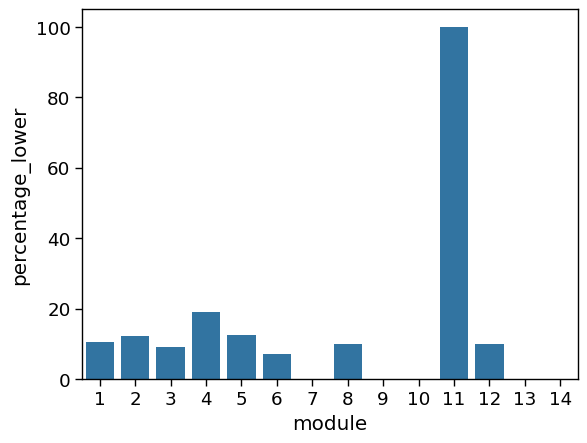

In [186]:
sns.barplot(x='module', y='percentage_lower', data=all)

In [184]:
all['numbers'] = all['node1_tf_lower'].fillna(0).astype(int).astype(str) + '/' + all['total_tf'].astype(int).astype(str) + ' (' + all['percentage_lower'].fillna(0).round(2).astype(str) + '%)'
number_tf_map = all.set_index('module')['numbers'].to_dict()

<Axes: xlabel='module', ylabel='dragon'>

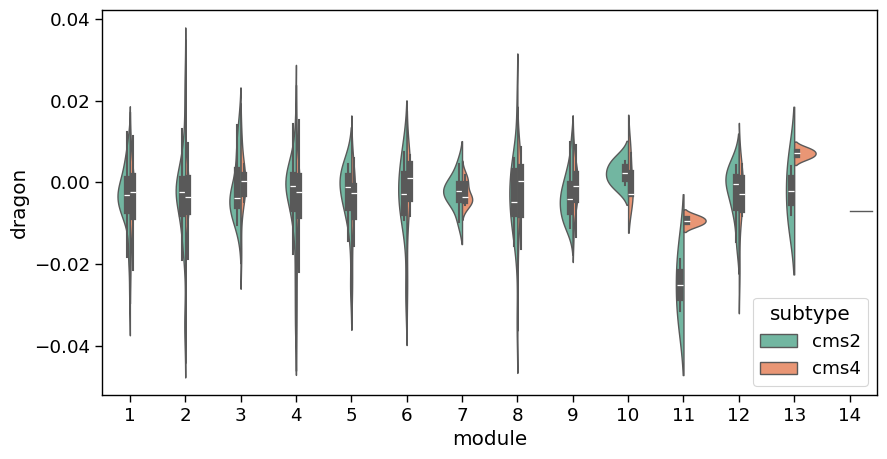

In [45]:
ttt4 = membership_dragon.loc[:,['module','cms4','raw_modularity']]
ttt4['subtype'] = 'cms4'
ttt4 = ttt4.rename(columns={'cms4': 'dragon'})

ttt2 = membership_dragon.loc[:,['module','cms2','raw_modularity']]
ttt2['subtype'] = 'cms2'
ttt2 = ttt2.rename(columns={'cms2': 'dragon'})

ttt = pd.concat([ttt2, ttt4], axis=0)
f, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x = 'module', y = 'dragon', data = ttt.reset_index(), palette = 'Set2', hue= 'subtype', split=True)


In [95]:
membership_dragon['cms2-cms4'] = membership_dragon['cms2'] - membership_dragon['cms4']
membership_dragon['lower_cms2_cms4'] = 2*membership_dragon['cms2_lower']+1*membership_dragon['cms4_lower']
membership_dragon['lower_cms2_cms4']  = membership_dragon['lower_cms2_cms4'].map({0:'none', 1:'cms4', 2:'cms2', 3:'both'})

In [116]:
l2 = membership_dragon[membership_dragon['lower']>0].loc[:,['module','node1_tf','cms2','cms2_lower','lower_cms2_cms4']].reset_index()
l2.columns = ['index', 'module', 'node1_tf', 'DRAGON M-E', 'islower', 'lower_cms2_cms4']
l2['subtype'] = 'cms2'

l4 = membership_dragon[membership_dragon['lower']>0].loc[:,['module','node1_tf','cms4','cms4_lower','lower_cms2_cms4']].reset_index()
l4.columns = ['index', 'module', 'node1_tf', 'DRAGON M-E', 'islower', 'lower_cms2_cms4']
l4['subtype'] = 'cms4'

lll = pd.concat([l2, l4], axis=0)
lll

,index,module,node1_tf,DRAGON M-E,islower,lower_cms2_cms4,subtype
0,10,2,BATF,-0.033872,True,both,cms2
1,24,5,CENPBD1,-0.025666,True,both,cms2
2,27,6,CREB3L1,-0.027208,True,both,cms2
3,32,5,CXXC5,-0.014416,False,cms4,cms2
4,68,1,FOXC2,NaN,False,cms4,cms2
...,...,...,...,...,...,...,...
48,390,4,ZNF605,-0.019966,True,cms4,cms4
49,399,4,ZNF704,-0.013453,False,cms2,cms4
50,408,4,ZNF785,-0.021827,True,both,cms4
51,410,1,ZNF8,-0.010338,False,cms2,cms4


/var/folders/1b/jphhn26s4zgfr0k1rxj7wfqr0000gn/T/ipykernel_41708/2659827890.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'DRAGON M-E', y = 'node1_tf', data = lll.reset_index(), hue = 'subtype', ax = ax, palette=sns.color_palette(['#1f77b4', '#d62728']), hue_order=['cms2', 'cms4'], alpha = 1, dodge=True, ci=None)


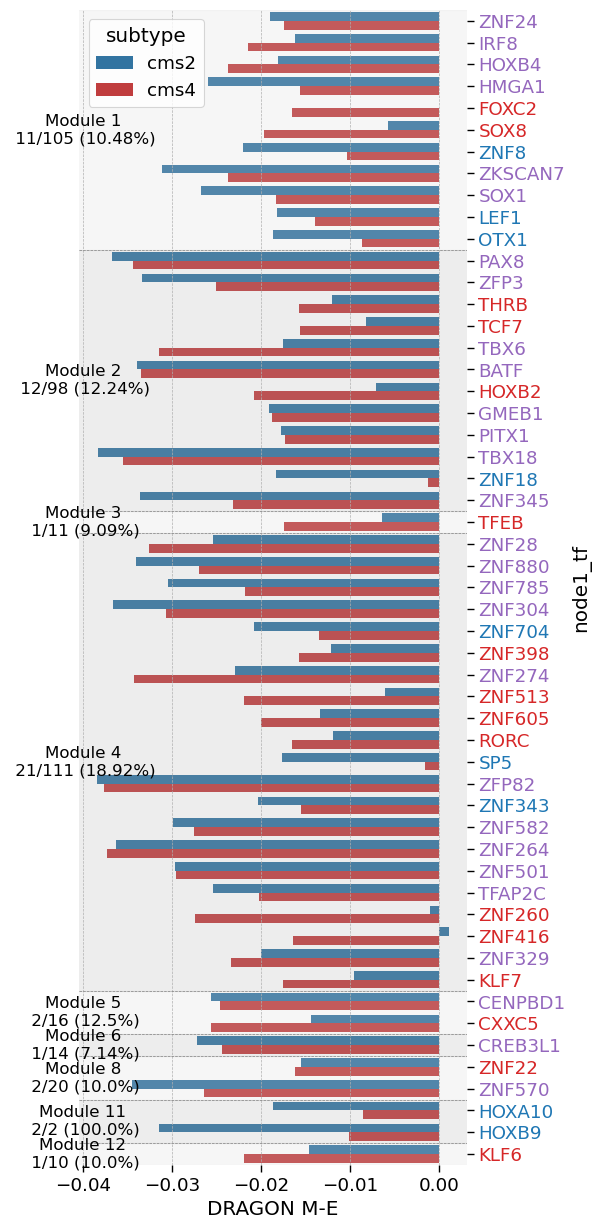

In [183]:
lll = lll.sort_values('module')
f, ax = plt.subplots(figsize=(5,15))
pal = sns.color_palette(['#808080', '#1f77b4', '#d62728', '#9467bd'])

ax.grid(axis = 'x', linestyle='--', linewidth=0.5)

sns.barplot(x = 'DRAGON M-E', y = 'node1_tf', data = lll.reset_index(), hue = 'subtype', ax = ax, palette=sns.color_palette(['#1f77b4', '#d62728']), hue_order=['cms2', 'cms4'], alpha = 1, dodge=True, ci=None)
# add horizontal lines for each module, you need to count how many TFs are in each module, because they need to separate
# the bars
total = 0
for i, module in enumerate(lll['module'].unique()):
    n_tfs = len(lll[lll['module']==module])/2
    total = total + n_tfs
    plt.axhline(y=total-0.5, color='gray', linestyle='--', linewidth=0.5)
    # chose a dark gray color for the module label
    plt.text(-0.04, total-n_tfs/2-0.5, f'Module {module}\n {number_tf_map[module]}', fontsize=12, va='center', ha='center', color='Black', rotation = 0)

# Can you swap the ytick labels to be on the right side of the plot?
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
        
# Color the yticklabels based on lower_cms2_cms4
for i, label in enumerate(ax.get_yticklabels()):
    a = lll[lll['node1_tf'] == label.get_text()]['lower_cms2_cms4']
    if a.iloc[0] == 'cms2':
        label.set_color('#1f77b4')
    elif a.iloc[0] == 'cms4':
        label.set_color('#d62728')
    elif a.iloc[0] == 'both':
        label.set_color('#9467bd')
    else:
        label.set_color('gray')

# Despine the axes
sns.despine(ax=ax, left=True, bottom=True)

# Can you color the module background alternating dark and light gray?
total = 0
for i, module in enumerate(lll['module'].unique()):
    n_tfs = len(lll[lll['module']==module])/2
    total = total + n_tfs
    if i % 2 == 0:
        ax.add_patch(plt.Rectangle((-0.05, total-n_tfs-0.5), 1.05, n_tfs, color='lightgray', alpha=0.2))
    else:
        ax.add_patch(plt.Rectangle((-0.05, total-n_tfs-0.5), 1.05, n_tfs, color='darkgray', alpha=0.2))

        

In [82]:
membership_dragon[membership_dragon['module']==11]

,node,module,modularity,node_name,node_type,n_tf,raw_modularity,node1,node2,cms1,...,node2_type,node1_tf,node2_tf,cms2_abs,cms4_abs,same,same TF,cms2_lower,cms4_lower,lower
101,HOXA10_A,11,0.187273,HOXA10,A,6,1.123641,HOXA10_methylation,HOXA10_expression,-0.011322,...,expression,HOXA10,HOXA10,0.018662,0.008572,1,True,True,False,1
112,HOXB9_A,11,0.188562,HOXB9,A,6,1.131375,HOXB9_methylation,HOXB9_expression,-0.004940,...,expression,HOXB9,HOXB9,0.031465,0.010178,1,True,True,False,1


In [187]:
dragon

,node1,node2,cms1,cms2,cms3,cms4,mean,abs_mean,var,node1_type,node2_type,node1_tf,node2_tf,cms2_abs,cms4_abs,same
edge,,,,,,,,,,,,,,,,
AC023509.3-AC092835.1,AC023509.3_methylation,AC092835.1_methylation,0.010079,-0.002448,-0.012452,0.011108,0.004330,0.006778,9.188426e-05,methylation,methylation,AC023509.3,AC092835.1,0.002448,0.011108,0
AC023509.3-AC138696.1,AC023509.3_methylation,AC138696.1_methylation,0.001609,0.008164,0.006137,0.004494,0.006329,0.006329,6.734373e-06,methylation,methylation,AC023509.3,AC138696.1,0.008164,0.004494,0
AC023509.3-AEBP1,AC023509.3_methylation,AEBP1_expression,-0.005313,0.002291,0.003407,-0.005202,-0.001455,0.003747,2.807274e-05,methylation,expression,AC023509.3,AEBP1,0.002291,0.005202,0
AC023509.3-AEBP1,AC023509.3_methylation,AEBP1_methylation,-0.001914,-0.004333,0.000148,0.002592,-0.000870,0.003462,2.397651e-05,methylation,methylation,AC023509.3,AEBP1,0.004333,0.002592,0
AC023509.3-AEBP2,AC023509.3_methylation,AEBP2_expression,0.001178,0.001567,0.001819,0.001794,0.001681,0.001681,2.580415e-08,methylation,expression,AC023509.3,AEBP2,0.001567,0.001794,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC-ZSCAN16,ZXDC_methylation,ZSCAN16_expression,-0.002064,-0.003141,0.000656,0.002289,-0.000426,0.002715,1.474362e-05,methylation,expression,ZXDC,ZSCAN16,0.003141,0.002289,0
ZXDC-ZSCAN22,ZXDC_methylation,ZSCAN22_expression,-0.003214,0.004883,0.003083,0.008613,0.006748,0.006748,6.959012e-06,methylation,expression,ZXDC,ZSCAN22,0.004883,0.008613,0
ZXDC-ZSCAN9,ZXDC_methylation,ZSCAN9_expression,-0.001471,0.001704,0.003811,0.008864,0.005284,0.005284,2.563205e-05,methylation,expression,ZXDC,ZSCAN9,0.001704,0.008864,0


In [188]:
membership_tf.head()

,node,module,modularity,node_name,node_type,n_tf,raw_modularity
0,ALX1_A,1,0.006097,ALX1,A,251,1.530413
1,ALX3_A,2,0.011064,ALX3,A,243,2.688537
2,ALX4_A,1,0.005248,ALX4,A,251,1.317150
3,AR_A,2,0.001445,AR,A,243,0.351055
4,ARGFX_A,2,0.012254,ARGFX,A,243,2.977676


In [237]:
dragon_membership = dragon.merge(membership_tf, left_on='node1_tf', right_on='node_name', how = 'inner')
dragon_membership = dragon_membership.merge(membership_tf, left_on='node2_tf', right_on='node_name', how = 'inner', suffixes=('_node1', '_node2'))
dragon_membership

,node1,node2,cms1,cms2,cms3,cms4,mean,abs_mean,var,node1_type,...,node_type_node1,n_tf_node1,raw_modularity_node1,node_node2,module_node2,modularity_node2,node_name_node2,node_type_node2,n_tf_node2,raw_modularity_node2
0,ALX1_methylation,ALX3_expression,0.001053,-0.000153,0.004419,-0.003929,-0.002041,0.002041,0.000007,methylation,...,A,251,1.530413,ALX3_A,2,0.011064,ALX3,A,243,2.688537
1,ALX1_methylation,ALX3_methylation,0.006730,0.020792,0.006312,-0.001288,0.009752,0.011040,0.000244,methylation,...,A,251,1.530413,ALX3_A,2,0.011064,ALX3,A,243,2.688537
2,ALX1_methylation,ARID3A_expression,-0.001987,-0.003328,0.000502,0.004791,0.000731,0.004060,0.000033,methylation,...,A,251,1.530413,ARID3A_A,1,0.005118,ARID3A,A,251,1.284610
3,ALX1_methylation,ARID3A_methylation,0.000727,0.001843,-0.004818,0.000094,0.000969,0.000969,0.000002,methylation,...,A,251,1.530413,ARID3A_A,1,0.005118,ARID3A,A,251,1.284610
4,ALX1_methylation,ARX_expression,0.003001,NaN,0.002638,NaN,NaN,NaN,NaN,methylation,...,A,251,1.530413,ARX_A,2,0.006048,ARX,A,243,1.469776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441869,ZSCAN9_methylation,ZNF880_expression,0.002108,-0.000161,-0.001436,-0.006715,-0.003438,0.003438,0.000021,methylation,...,A,251,0.696806,ZNF880_A,4,0.010618,ZNF880,A,267,2.835030
441870,ZSCAN9_methylation,ZNF8_expression,-0.000274,-0.000908,0.001391,0.001490,0.000291,0.001199,0.000003,methylation,...,A,251,0.696806,ZNF8_A,1,0.001666,ZNF8,A,251,0.418046
441871,ZSCAN9_methylation,ZSCAN16_expression,-0.003786,0.002099,-0.002870,-0.002250,-0.000076,0.002175,0.000009,methylation,...,A,251,0.696806,ZSCAN16_A,4,0.000670,ZSCAN16,A,267,0.178955
441872,ZSCAN9_methylation,ZSCAN22_expression,0.002384,-0.002889,-0.003608,0.000893,-0.000998,0.001891,0.000007,methylation,...,A,251,0.696806,ZSCAN22_A,4,0.004847,ZSCAN22,A,267,1.294188


<Axes: xlabel='cms2', ylabel='cms4'>

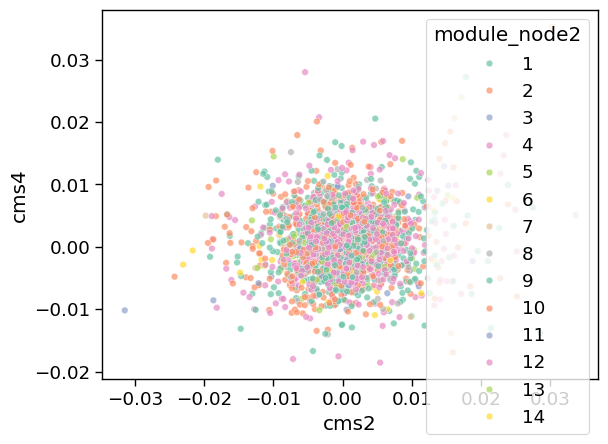

In [300]:
sns.scatterplot( data = dragon_membership[dragon_membership['module_node1']==11], x = 'cms2', y = 'cms4', hue = 'module_node2', alpha = 0.7, palette = 'Set2')

In [307]:
dragon_membership[(dragon_membership['module_node1']==11) & (dragon_membership['module_node2']==11)]

,node1,node2,cms1,cms2,cms3,cms4,mean,abs_mean,var,node1_type,...,module_node2,modularity_node2,node_name_node2,node_type_node2,n_tf_node2,raw_modularity_node2,cms2-cms4,random_cms2,random_cms4,dif_cms2_cms4
157382,HOXA10_expression,HOXB9_expression,0.000086,0.002468,-0.000754,-0.005120,-0.001326,0.003794,0.000029,expression,...,11,0.188562,HOXB9,A,6,1.131375,0.007588,0.009220,0.012401,-0.003181
157791,HOXA10_methylation,HOXA10_expression,-0.011322,-0.018662,-0.012591,-0.008572,-0.013617,0.013617,0.000051,methylation,...,11,0.187273,HOXA10,A,6,1.123641,-0.010091,0.009283,-0.001089,0.010371
157813,HOXA10_methylation,HOXB9_expression,-0.001278,0.002829,-0.000693,0.005948,0.004389,0.004389,0.000005,methylation,...,11,0.188562,HOXB9,A,6,1.131375,-0.003119,NaN,0.000817,NaN
157814,HOXA10_methylation,HOXB9_methylation,-0.004132,-0.010093,0.011026,0.009776,-0.000159,0.009935,0.000197,methylation,...,11,0.188562,HOXB9,A,6,1.131375,-0.019869,-0.001347,-0.004257,0.002910
170781,HOXB9_methylation,HOXA10_expression,0.000351,0.000222,0.001236,0.005475,0.002848,0.002848,0.000014,methylation,...,11,0.187273,HOXA10,A,6,1.123641,-0.005253,0.009730,-0.002933,0.012663
170792,HOXB9_methylation,HOXB9_expression,-0.004940,-0.031465,-0.014421,-0.010178,-0.020821,0.020821,0.000227,methylation,...,11,0.188562,HOXB9,A,6,1.131375,-0.021287,0.010378,0.005677,0.004701


<Axes: xlabel='module_node2', ylabel='module_node1'>

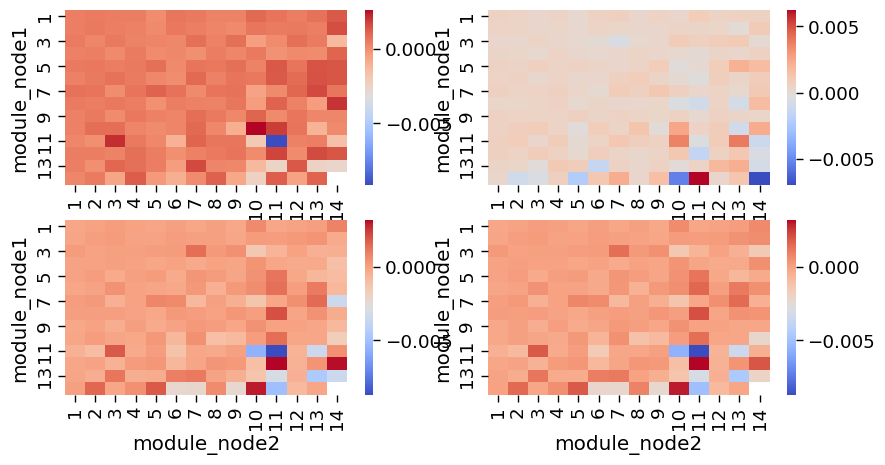

In [241]:
# Put the cms2 and cms4 together, add the difference
dragon_membership['cms2-cms4'] = dragon_membership['cms2'] - dragon_membership['cms4']

f, ax = plt.subplots(2,2, figsize=(10,5))
sns.heatmap(pd.pivot_table(dragon_membership, values='cms2', index='module_node1', columns = 'module_node2'), cmap='coolwarm', ax=ax[0][0])
sns.heatmap(pd.pivot_table(dragon_membership, values='cms4', index='module_node1', columns = 'module_node2'), cmap='coolwarm', ax=ax[0][1])
sns.heatmap(pd.pivot_table(dragon_membership, values='cms2-cms4', index='module_node1', columns = 'module_node2'), cmap='coolwarm', ax=ax[1][0])
# Plot the difference of the pivot tables
sns.heatmap(pd.pivot_table(dragon_membership, values='cms2', index='module_node1', columns = 'module_node2') - pd.pivot_table(dragon_membership, values='cms4', index='module_node1', columns = 'module_node2'), cmap='coolwarm', ax=ax[1][1])

In [294]:
dragon_membership['dif_cms2_cms4'] = dragon_membership['cms2'] - dragon_membership['cms4']
# Group by module
grouped = dragon_membership.groupby(['module_node1', 'module_node2']).agg({'dif_cms2_cms4': 'mean'}).reset_index() 
original = grouped['dif_cms2_cms4'].values


# Try reshuffling the modules
nperm = 10000
null_dist = np.zeros((nperm, dragon_membership.groupby(['module_node1', 'module_node2']).agg({'cms2': 'mean'}).shape[0]))

for i in range(nperm):
    dragon_membership['random_cms2'] = np.random.permutation(dragon_membership['cms2'])
    dragon_membership['random_cms4'] = np.random.permutation(dragon_membership['cms4'])
    # Compute the difference between cms2 and cms4 and group them by module
    dragon_membership['dif_cms2_cms4'] = dragon_membership['random_cms2'] - dragon_membership['random_cms4']
    # Group by module
    grouped = dragon_membership.groupby(['module_node1', 'module_node2']).agg({'dif_cms2_cms4': 'mean'}).reset_index() 

    null_dist[i, :] = grouped['dif_cms2_cms4'].values

In [295]:
null_df = pd.DataFrame(null_dist, index = np.arange(nperm), columns=grouped.index)
null_df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,-1.615481e-05,0.000059,-0.000074,0.000019,-0.000095,-1.008830e-04,-0.000143,0.000053,-0.000028,-0.000291,...,0.002724,0.000787,0.002265,-0.001152,0.003338,-0.002374,0.002634,-0.002624,0.002550,0.006446
1,-2.099078e-05,-0.000041,-0.000120,-0.000009,-0.000085,-5.504806e-05,0.000068,0.000067,0.000022,-0.000152,...,0.001064,0.000881,0.002087,0.002245,-0.001486,-0.002642,0.008270,0.000390,-0.000205,0.000971
2,-5.262300e-05,-0.000005,-0.000020,-0.000006,0.000057,1.572812e-04,0.000149,-0.000019,0.000106,0.000192,...,0.001879,-0.001277,0.000370,0.000985,-0.003434,-0.007998,-0.000048,0.003309,-0.002302,0.003204
3,-2.948063e-05,-0.000029,0.000017,0.000033,-0.000189,8.224926e-07,-0.000190,0.000012,0.000017,0.000048,...,-0.001616,-0.000118,-0.000617,-0.000270,0.001334,0.004720,0.010704,0.000864,-0.007250,NaN
4,-2.701980e-05,-0.000004,0.000005,-0.000087,0.000227,-5.636236e-05,-0.000045,-0.000086,-0.000085,-0.000417,...,0.000580,-0.002316,0.001712,0.000216,0.002112,-0.005144,0.005562,0.003152,-0.008248,0.005600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5.347140e-05,-0.000076,-0.000125,-0.000003,-0.000067,-1.311820e-04,0.000030,0.000063,-0.000069,0.000402,...,0.000849,0.000784,-0.000465,0.000722,-0.000270,0.000300,-0.006554,0.002732,0.001959,0.000010
9996,-9.724573e-07,0.000016,0.000014,0.000008,-0.000012,6.520777e-05,0.000080,0.000197,0.000148,0.000198,...,-0.002984,-0.000653,0.001971,-0.001283,-0.002546,-0.009424,-0.000810,0.000052,-0.002524,NaN
9997,2.385307e-05,-0.000027,-0.000093,-0.000055,-0.000045,1.051500e-04,0.000158,0.000083,-0.000075,-0.000009,...,-0.000163,0.000883,-0.001515,-0.000707,-0.000850,-0.000993,-0.001375,0.003634,-0.003018,-0.007746
9998,-1.494587e-05,0.000001,0.000204,0.000019,0.000152,-3.364636e-04,-0.000265,0.000033,-0.000048,-0.000868,...,0.000810,0.000562,0.000210,-0.000840,-0.000959,0.000332,-0.009173,0.001219,-0.000377,0.018197


[Text(0, 0.5, 'Module 1'),
 Text(0, 1.5, 'Module 2'),
 Text(0, 2.5, 'Module 3'),
 Text(0, 3.5, 'Module 4'),
 Text(0, 4.5, 'Module 5'),
 Text(0, 5.5, 'Module 6'),
 Text(0, 6.5, 'Module 7'),
 Text(0, 7.5, 'Module 8'),
 Text(0, 8.5, 'Module 9'),
 Text(0, 9.5, 'Module 10'),
 Text(0, 10.5, 'Module 11'),
 Text(0, 11.5, 'Module 12'),
 Text(0, 12.5, 'Module 13'),
 Text(0, 13.5, 'Module 14')]

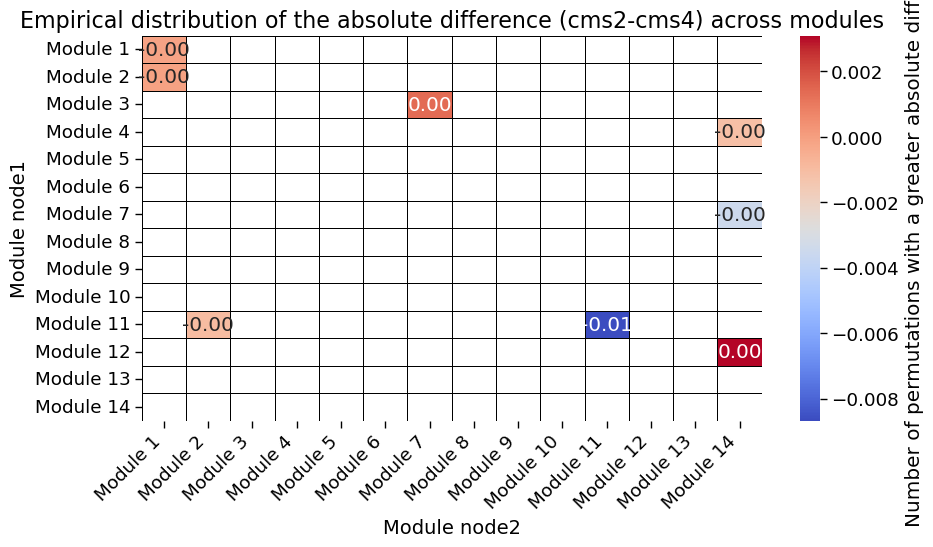

In [315]:
# Test that one array is different from the distribution of the other
empirical = 1+(np.abs(null_dist)>np.abs(original)).sum(axis = 0)
empirical = empirical/(nperm+1)
# reshape empirical to the shape of the pivot table
null_df = null_dist.mean(axis = 0).reshape(pd.pivot_table(dragon_membership, values='cms2', index='module_node1', columns = 'module_node2').shape)
empirical = empirical.reshape(pd.pivot_table(dragon_membership, values='cms2', index='module_node1', columns = 'module_node2').shape)
original_df = original.reshape(pd.pivot_table(dragon_membership, values='cms2', index='module_node1', columns = 'module_node2').shape)
# Plot the empirical distribution
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(original_df, cmap='coolwarm', cbar_kws={'label': 'Number of permutations with a greater absolute difference'}, 
            mask = (empirical > 0.05), annot=True, fmt='.2f', linewidths=.5, linecolor='black', ax=ax)
ax.set_title('Empirical distribution of the absolute difference (cms2-cms4) across modules', fontsize= 16)
ax.set_xlabel('Module node2', fontsize=14)
ax.set_ylabel('Module node1', fontsize=14)
# Set the xtickt to be the module names
ax.set_xticklabels([f'Module {i}' for i in pd.pivot_table(dragon_membership, values='cms2', index='module_node1', columns = 'module_node2').columns], rotation=45, ha='right')
ax.set_yticklabels([f'Module {i}' for i in pd.pivot_table(dragon_membership, values='cms2', index='module_node1', columns = 'module_node2').index], rotation=0, va='center')

In [317]:
np.where(empirical < 0.05)

(array([ 0,  1,  2,  3,  6, 10, 10, 11, 13]),
 array([ 0,  0,  6, 13, 13,  1, 10, 13, 13]))

In [316]:
# How many significant?
sig = len(np.where(empirical < 0.05)[0])
sig

9

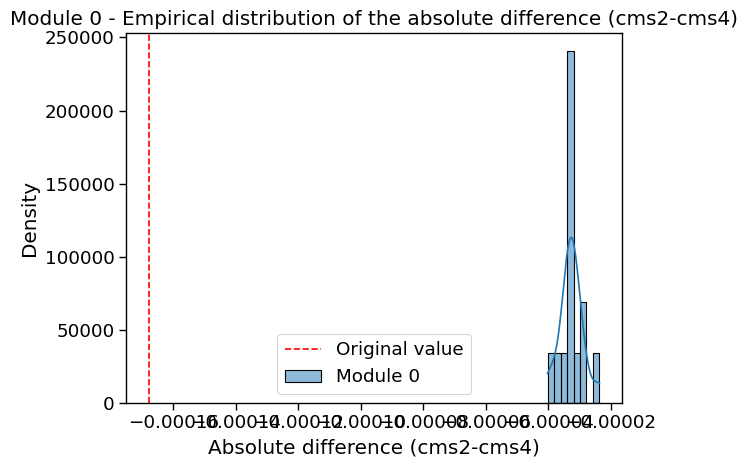

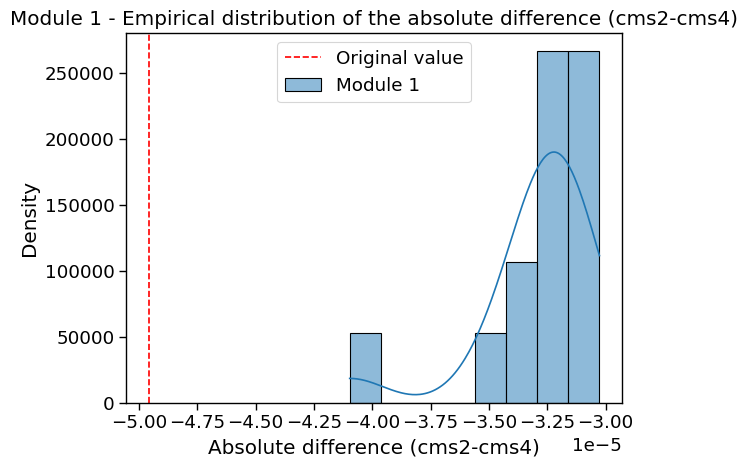

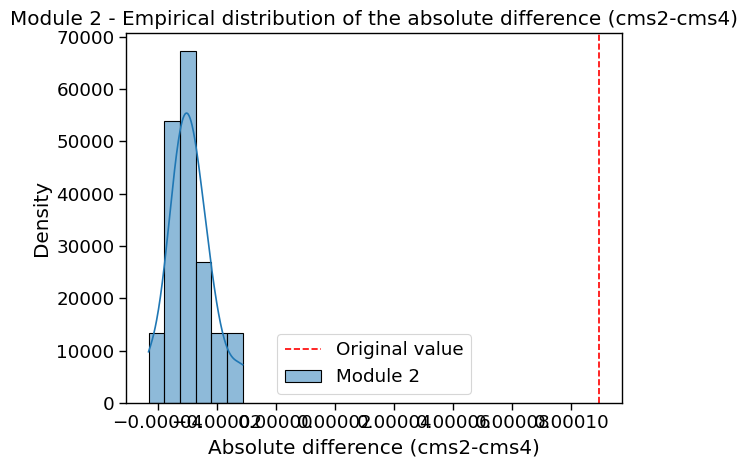

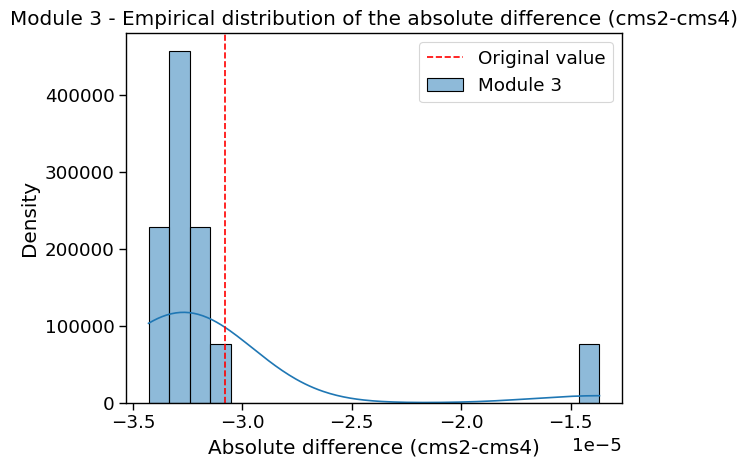

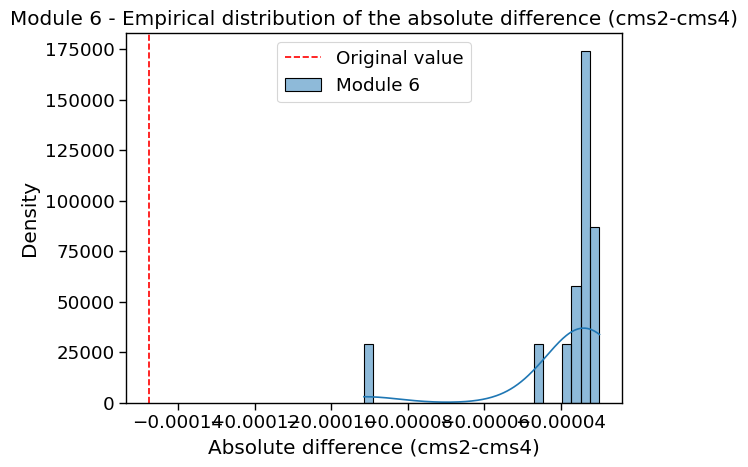

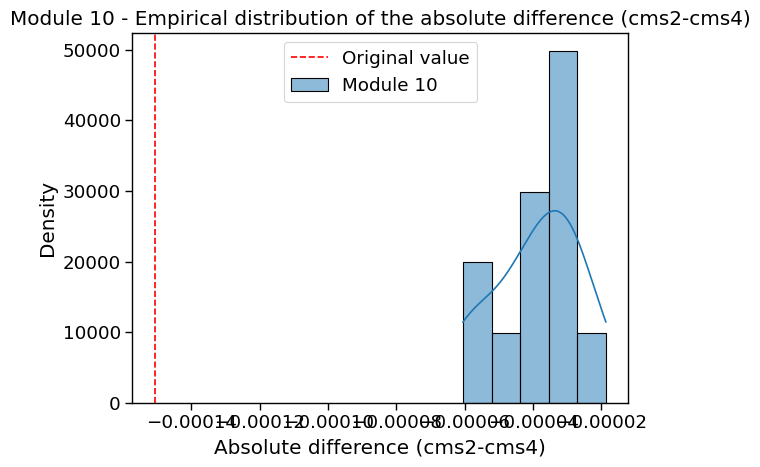

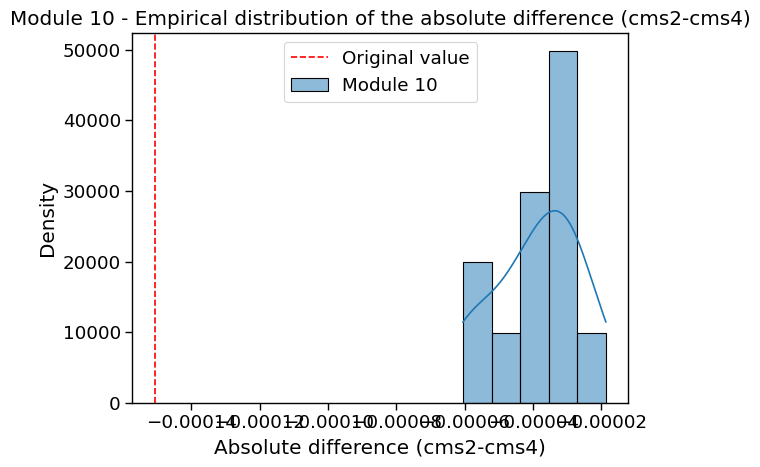

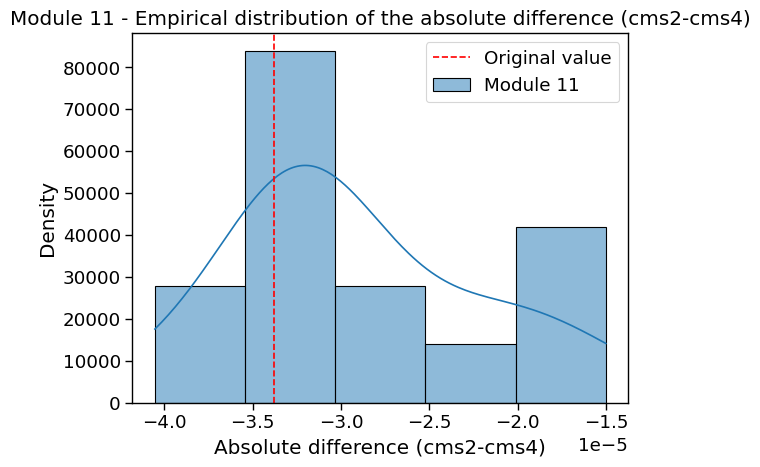

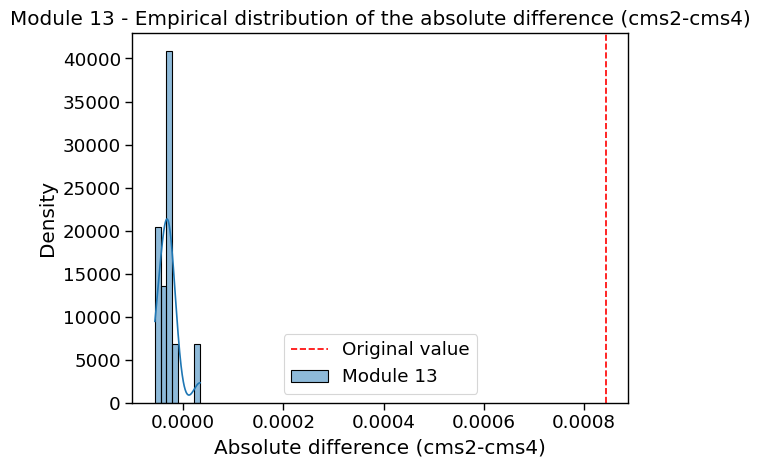

In [318]:
for i in np.where(empirical < 0.05)[0]:
    sns.histplot(null_df[:, i], label=f'Module {i}', kde=True, stat='density', common_norm=False)
    plt.axvline(original[i], color='red', linestyle='--', label='Original value')
    plt.title(f'Module {i} - Empirical distribution of the absolute difference (cms2-cms4)')
    plt.xlabel('Absolute difference (cms2-cms4)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [ ]:
sns.heatm

array([[0.00599401, 0.3996004 , 0.4955045 , 0.58241758, 0.42857143,
        0.97702298, 0.4005994 , 0.87912088, 0.10589411, 0.08191808,
        0.71928072, 0.84615385, 0.8961039 , 0.06193806],
       [0.04795205, 0.47652348, 0.31568432, 0.2997003 , 0.73826174,
        0.34565435, 0.85314685, 0.97202797, 0.1998002 , 0.68831169,
        0.83016983, 0.24875125, 0.24075924, 0.47552448],
       [0.33266733, 0.88611389, 0.96503497, 0.80619381, 0.81918082,
        0.77422577, 0.03096903, 0.55344655, 0.29170829, 0.28871129,
        0.67432567, 0.95404595, 0.66433566, 0.74825175],
       [0.15484515, 0.8971029 , 0.99200799, 0.50849151, 0.33266733,
        0.79020979, 0.16983017, 0.84015984, 0.3976024 , 0.31768232,
        0.76823177, 0.14385614, 0.54945055, 0.02297702],
       [0.43956044, 0.3986014 , 0.42757243, 0.80919081, 0.68631369,
        0.36863137, 0.39060939, 0.56743257, 0.70729271, 0.53846154,
        0.2017982 , 0.53646354, 0.36463536, 0.44155844],
       [0.11988012, 0.60939061, 0.2

### Role of HOXA10 and HOXB9


/var/folders/1b/jphhn26s4zgfr0k1rxj7wfqr0000gn/T/ipykernel_41708/3800523458.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'module', y = 'cms4', data = membership_dragon, palette = 'Set2')


<Axes: xlabel='module', ylabel='cms4'>

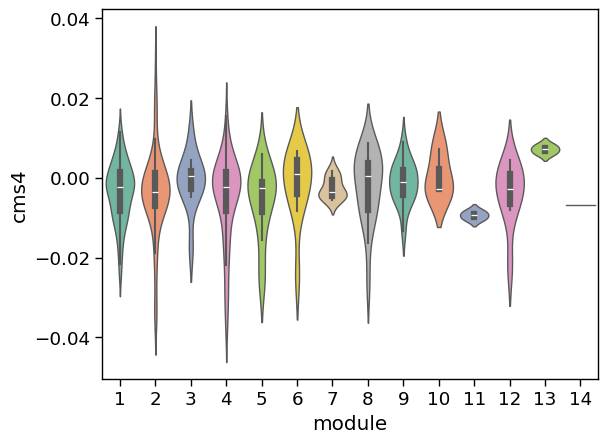

In [32]:
sns.violinplot(x = 'module', y = 'cms4', data = membership_dragon, palette = 'Set2')

/var/folders/1b/jphhn26s4zgfr0k1rxj7wfqr0000gn/T/ipykernel_41708/261549189.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'cms4', y = 'raw_modularity', data = membership_dragon, palette = 'Set2')


<Axes: xlabel='cms4', ylabel='raw_modularity'>

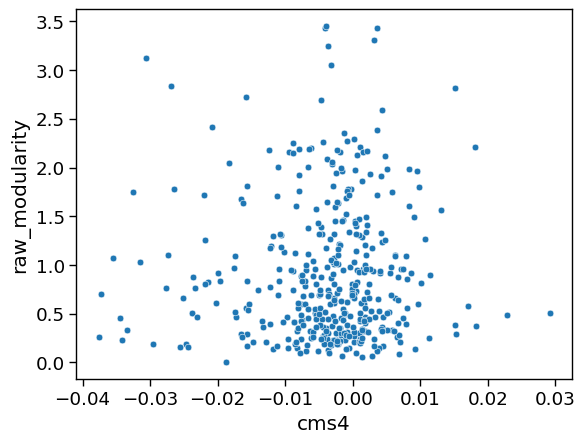

In [39]:
sns.scatterplot(x = 'cms4', y = 'raw_modularity', data = membership_dragon, palette = 'Set2')